<h2><center>California K-12 Public Schools</center></h2>
<h1><center>Meeting the Standards Projection</center></h1>


   <img src='images/istock_kids_stem_0.jpeg' width="900">
   
   **Credit:**  [natural start](https://naturalstart.org/feature-stories/engaging-children-stem-education-early)

In [1]:
# Load relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import warnings

sns.set(style='ticks')

warnings.filterwarnings("ignore")  # Suppress all warnings

# EXPLORATORY DATA ANALYSIS
## Model development dataset is ready for exploration

### Summary statistics
- Check individual variable distribution
    - verify the spread of the data
    - may be able to infer the mean from distribution plots
    
### Review for outliers and anomalies
- Boxplots
    - Quick way to identify outliers or anomalous observations
    - Important to consider these in the context of the problem

In [70]:
# load datafiles

# dfs with number of students as values
df_language = pd.read_csv('data/df_language_clean')
df_math = pd.read_csv('data/df_math_clean')

# dfs with percentage of students as values
language = pd.read_csv('data/language_with_percentage_values')
math = pd.read_csv('data/math_with_percentage_values')

In [71]:
language.head()

School Name  School Code  Zip Code  County Name  \
0  21st Century Learning Institute       129882     92223    Riverside   
1          A. E. Arnold Elementary      6027767     90630       Orange   
2            A. G. Cook Elementary      6028211     92844       Orange   
3              A. G. Currie Middle      6085377     92780       Orange   
4           A. J. Dorsa Elementary      6046114     95122  Santa Clara   

   County Code   Latitude   Longitude  Median Household Income  \
0         33.0  33.962281 -116.984589                  64738.0   
1         30.0  33.824900 -118.045700                  84051.0   
2         30.0  33.777700 -117.953000                  48345.0   
3         30.0  33.743100 -117.824900                  64089.0   
4         43.0  37.369388 -121.833560                  57470.0   

   CAASPP Reported Enrollment  Enrollment K-12  ...  Hispanic  \
0                        58.0             88.0  ...     56.90   
1                       447.0            739.0  ...     29.31   
2                       192.0            366.0  ...     22.40   
3                       585.0            611.0  ...     90.94   
4                       184.0            371.0  ...     90.22   

   Pacific Islander  White  Two/More Races  < High School  High School Grad  \
0              0.00  31.03            0.00          10.34             22.41   
1             -0.22  24.83            1.57           3.36              9.84   
2              0.00   5.21            3.12          -0.52              6.77   
3             -0.17   2.56           -0.17          38.12             28.72   
4              0.00  -0.54           -0.54          44.57             29.89   

   Some College  College Grad  Graduate School  \
0         37.93         15.52             6.90   
1         19.02         30.87            27.07   
2          7.29         17.19             3.12   
3         14.02          6.67             2.56   
4         13.04          8.15            -0.54   

   Percentage Standard Met and Above  
0                              44.64  
1                              65.60  
2                              81.18  
3                              30.38  
4                              29.83  

[5 rows x 35 columns]

In [72]:
# Summary statistics of columns of interest - table uses df_language which has the values as count not percentage
table = df_language[['Median Household Income', 'CAASPP Reported Enrollment',
       'Enrollment K-12', 'Total Revenue per Pupil',
       'Total Expenditures per Pupil', 'Free Meal Count K-12',
       'Current Expense Per ADA', 'Male', 'Female', 'Military', 'Non Military',
       'Homeless', 'Non Homeless', 'Disadvantaged', 'Not Disadvantaged',
       'Black', 'Native American', 'Asian', 'Hispanic', 'Pacific Islander',
       'White', 'Two/More Races', '< High School', 'High School Grad',
       'Some College', 'College Grad', 'Graduate School',
       'Percentage Standard Met and Above']]

table.describe().T.apply(lambda s: s.apply('{0:.2f}'.format)) #lambda function suppress scientific notation

count      mean       std       min  \
Median Household Income            9646.00  62594.36  25278.66  11922.00   
CAASPP Reported Enrollment         9646.00    340.92    273.12     11.00   
Enrollment K-12                    9646.00    641.40    533.32      0.00   
Total Revenue per Pupil            9646.00  14506.12   3195.08    632.00   
Total Expenditures per Pupil       9646.00  14494.85   3352.22    490.00   
Free Meal Count K-12               9646.00    336.84    311.58      0.00   
Current Expense Per ADA            9646.00  13592.73   4798.39   7970.70   
Male                               9646.00    174.28    138.89     -1.00   
Female                             9646.00    166.58    135.48     -1.00   
Military                           9646.00      3.25     16.36     -1.00   
Non Military                       9646.00    337.33    270.77      5.00   
Homeless                           9646.00     11.68     24.50     -1.00   
Non Homeless                       9646.00    328.45    266.12     -1.00   
Disadvantaged                      9646.00    207.42    193.57     -1.00   
Not Disadvantaged                  9646.00    133.36    174.65     -1.00   
Black                              9646.00     17.52     31.95     -1.00   
Native American                    9646.00      0.62      5.21     -1.00   
Asian                              9646.00     30.90     72.81     -1.00   
Hispanic                           9646.00    186.80    186.97     -1.00   
Pacific Islander                   9646.00      0.64      3.47     -1.00   
White                              9646.00     77.17    113.70     -1.00   
Two/More Races                     9646.00     12.80     20.58     -1.00   
< High School                      9646.00     49.99     68.95     -1.00   
High School Grad                   9646.00     70.74     69.53     -1.00   
Some College                       9646.00     69.06     68.73     -1.00   
College Grad                       9646.00     65.46     80.60     -1.00   
Graduate School                    9646.00     46.50     82.60     -1.00   
Percentage Standard Met and Above  9646.00     47.75     20.65      0.00   

                                        25%       50%       75%        max  
Median Household Income            43526.00  56671.00  77080.75  236912.00  
CAASPP Reported Enrollment           169.00    280.00    424.00    3665.00  
Enrollment K-12                      351.00    530.00    750.00    6324.00  
Total Revenue per Pupil            13068.00  14107.00  15411.00  106533.00  
Total Expenditures per Pupil       12937.00  14225.00  15700.00   99133.00  
Free Meal Count K-12                 120.00    266.00    453.00    3863.00  
Current Expense Per ADA            11860.86  12983.99  14218.36  126344.42  
Male                                  87.00    144.00    217.00    1818.00  
Female                                82.00    136.00    207.75    1847.00  
Military                               0.00      0.00      0.00     408.00  
Non Military                         167.00    277.00    419.00    3532.00  
Homeless                              -1.00      4.00     13.00     400.00  
Non Homeless                         160.00    268.00    407.00    3507.00  
Disadvantaged                         68.00    159.00    284.75    1776.00  
Not Disadvantaged                     25.00     69.00    180.00    1889.00  
Black                                  0.00      6.00     21.00     369.00  
Native American                       -1.00      0.00      0.00     272.00  
Asian                                  0.00      7.00     27.00    1042.00  
Hispanic                              54.00    135.00    257.00    1727.00  
Pacific Islander                      -1.00      0.00      0.00      60.00  
White                                  9.00     33.00    105.00    1652.00  
Two/More Races                         0.00      6.00     18.00     422.00  
< High School                          7.00     26.00     67.

In [73]:
math.head()

School Name  School Code  Zip Code  County Name  \
0  21st Century Learning Institute       129882     92223    Riverside   
1          A. E. Arnold Elementary      6027767     90630       Orange   
2            A. G. Cook Elementary      6028211     92844       Orange   
3              A. G. Currie Middle      6085377     92780       Orange   
4           A. J. Dorsa Elementary      6046114     95122  Santa Clara   

   County Code   Latitude   Longitude  Median Household Income  \
0         33.0  33.962281 -116.984589                  64738.0   
1         30.0  33.824900 -118.045700                  84051.0   
2         30.0  33.777700 -117.953000                  48345.0   
3         30.0  33.743100 -117.824900                  64089.0   
4         43.0  37.369388 -121.833560                  57470.0   

   CAASPP Reported Enrollment  Enrollment K-12  ...  Hispanic  \
0                        58.0             88.0  ...     56.90   
1                       447.0            739.0  ...     29.31   
2                       192.0            366.0  ...     22.40   
3                       585.0            611.0  ...     90.94   
4                       184.0            371.0  ...     90.22   

   Pacific Islander  White  Two/More Races  < High School  High School Grad  \
0              0.00  31.03            0.00          10.34             22.41   
1             -0.22  24.83            1.57           3.36              9.84   
2              0.00   5.21            3.12          -0.52              6.77   
3             -0.17   2.56           -0.17          38.12             28.72   
4              0.00  -0.54           -0.54          44.57             29.89   

   Some College  College Grad  Graduate School  \
0         37.93         15.52             6.90   
1         19.02         30.87            27.07   
2          7.29         17.19             3.12   
3         14.02          6.67             2.56   
4         13.04          8.15            -0.54   

   Percentage Standard Met and Above  
0                              10.71  
1                              63.41  
2                              71.81  
3                              18.35  
4                              25.41  

[5 rows x 35 columns]

In [74]:
# Summary statistics of columns of interest - table1 uses df_language which has the values as count not percentage
table1 = df_math[['Median Household Income', 'CAASPP Reported Enrollment',
       'Enrollment K-12', 'Total Revenue per Pupil',
       'Total Expenditures per Pupil', 'Free Meal Count K-12',
       'Current Expense Per ADA', 'Male', 'Female', 'Military', 'Non Military',
       'Homeless', 'Non Homeless', 'Disadvantaged', 'Not Disadvantaged',
       'Black', 'Native American', 'Asian', 'Hispanic', 'Pacific Islander',
       'White', 'Two/More Races', '< High School', 'High School Grad',
       'Some College', 'College Grad', 'Graduate School',
       'Percentage Standard Met and Above']]

table1.describe().T.apply(lambda s: s.apply('{0:.2f}'.format)) #lambda function suppress scientific notation

count      mean       std       min  \
Median Household Income            9637.00  62591.94  25273.60  11922.00   
CAASPP Reported Enrollment         9637.00    341.21    273.04     11.00   
Enrollment K-12                    9637.00    641.92    533.28      0.00   
Total Revenue per Pupil            9637.00  14504.58   3193.93    632.00   
Total Expenditures per Pupil       9637.00  14493.53   3351.54    490.00   
Free Meal Count K-12               9637.00    337.06    311.63      0.00   
Current Expense Per ADA            9637.00  13591.03   4799.42   7970.70   
Male                               9637.00    174.43    138.85     -1.00   
Female                             9637.00    166.73    135.44     -1.00   
Military                           9637.00      3.25     16.37     -1.00   
Non Military                       9637.00    337.62    270.70      5.00   
Homeless                           9637.00     11.70     24.51     -1.00   
Non Homeless                       9637.00    328.72    266.05     -1.00   
Disadvantaged                      9637.00    207.60    193.55     -1.00   
Not Disadvantaged                  9637.00    133.48    174.69     -1.00   
Black                              9637.00     17.52     31.96     -1.00   
Native American                    9637.00      0.62      5.21     -1.00   
Asian                              9637.00     30.93     72.83     -1.00   
Hispanic                           9637.00    186.96    186.96     -1.00   
Pacific Islander                   9637.00      0.63      3.47     -1.00   
White                              9637.00     77.23    113.73     -1.00   
Two/More Races                     9637.00     12.81     20.59     -1.00   
< High School                      9637.00     50.03     68.96     -1.00   
High School Grad                   9637.00     70.80     69.53     -1.00   
Some College                       9637.00     69.12     68.73     -1.00   
College Grad                       9637.00     65.52     80.61     -1.00   
Graduate School                    9637.00     46.55     82.63     -1.00   
Percentage Standard Met and Above  9637.00     36.74     21.97      0.00   

                                        25%       50%       75%        max  
Median Household Income            43526.00  56671.00  77047.00  236912.00  
CAASPP Reported Enrollment           169.00    280.00    424.00    3666.00  
Enrollment K-12                      352.00    531.00    750.00    6324.00  
Total Revenue per Pupil            13068.00  14107.00  15411.00  106533.00  
Total Expenditures per Pupil       12937.00  14225.00  15700.00   99133.00  
Free Meal Count K-12                 120.00    266.00    454.00    3863.00  
Current Expense Per ADA            11860.86  12983.99  14218.36  126344.42  
Male                                  87.00    144.00    217.00    1818.00  
Female                                82.00    136.00    208.00    1848.00  
Military                               0.00      0.00      0.00     408.00  
Non Military                         167.00    277.00    419.00    3533.00  
Homeless                              -1.00      4.00     13.00     401.00  
Non Homeless                         161.00    268.00    407.00    3508.00  
Disadvantaged                         68.00    159.00    285.00    1777.00  
Not Disadvantaged                     25.00     69.00    180.00    1889.00  
Black                                  0.00      6.00     21.00     369.00  
Native American                       -1.00      0.00      0.00     272.00  
Asian                                  0.00      7.00     27.00    1042.00  
Hispanic                              54.00    135.00    257.00    1730.00  
Pacific Islander                      -1.00      0.00      0.00      60.00  
White                                  9.00     33.00    105.00    1652.00  
Two/More Races                         0.00      6.00     18.00     422.00  
< High School                          7.00     26.00     67.

## Visualizing relationship between variables
- Correlation matrix
    - Look at correlation for each variable in the dataframe
    - Using Pearson correlation heatmap
- Pairplots
    - Visualizing variables distribution against one another

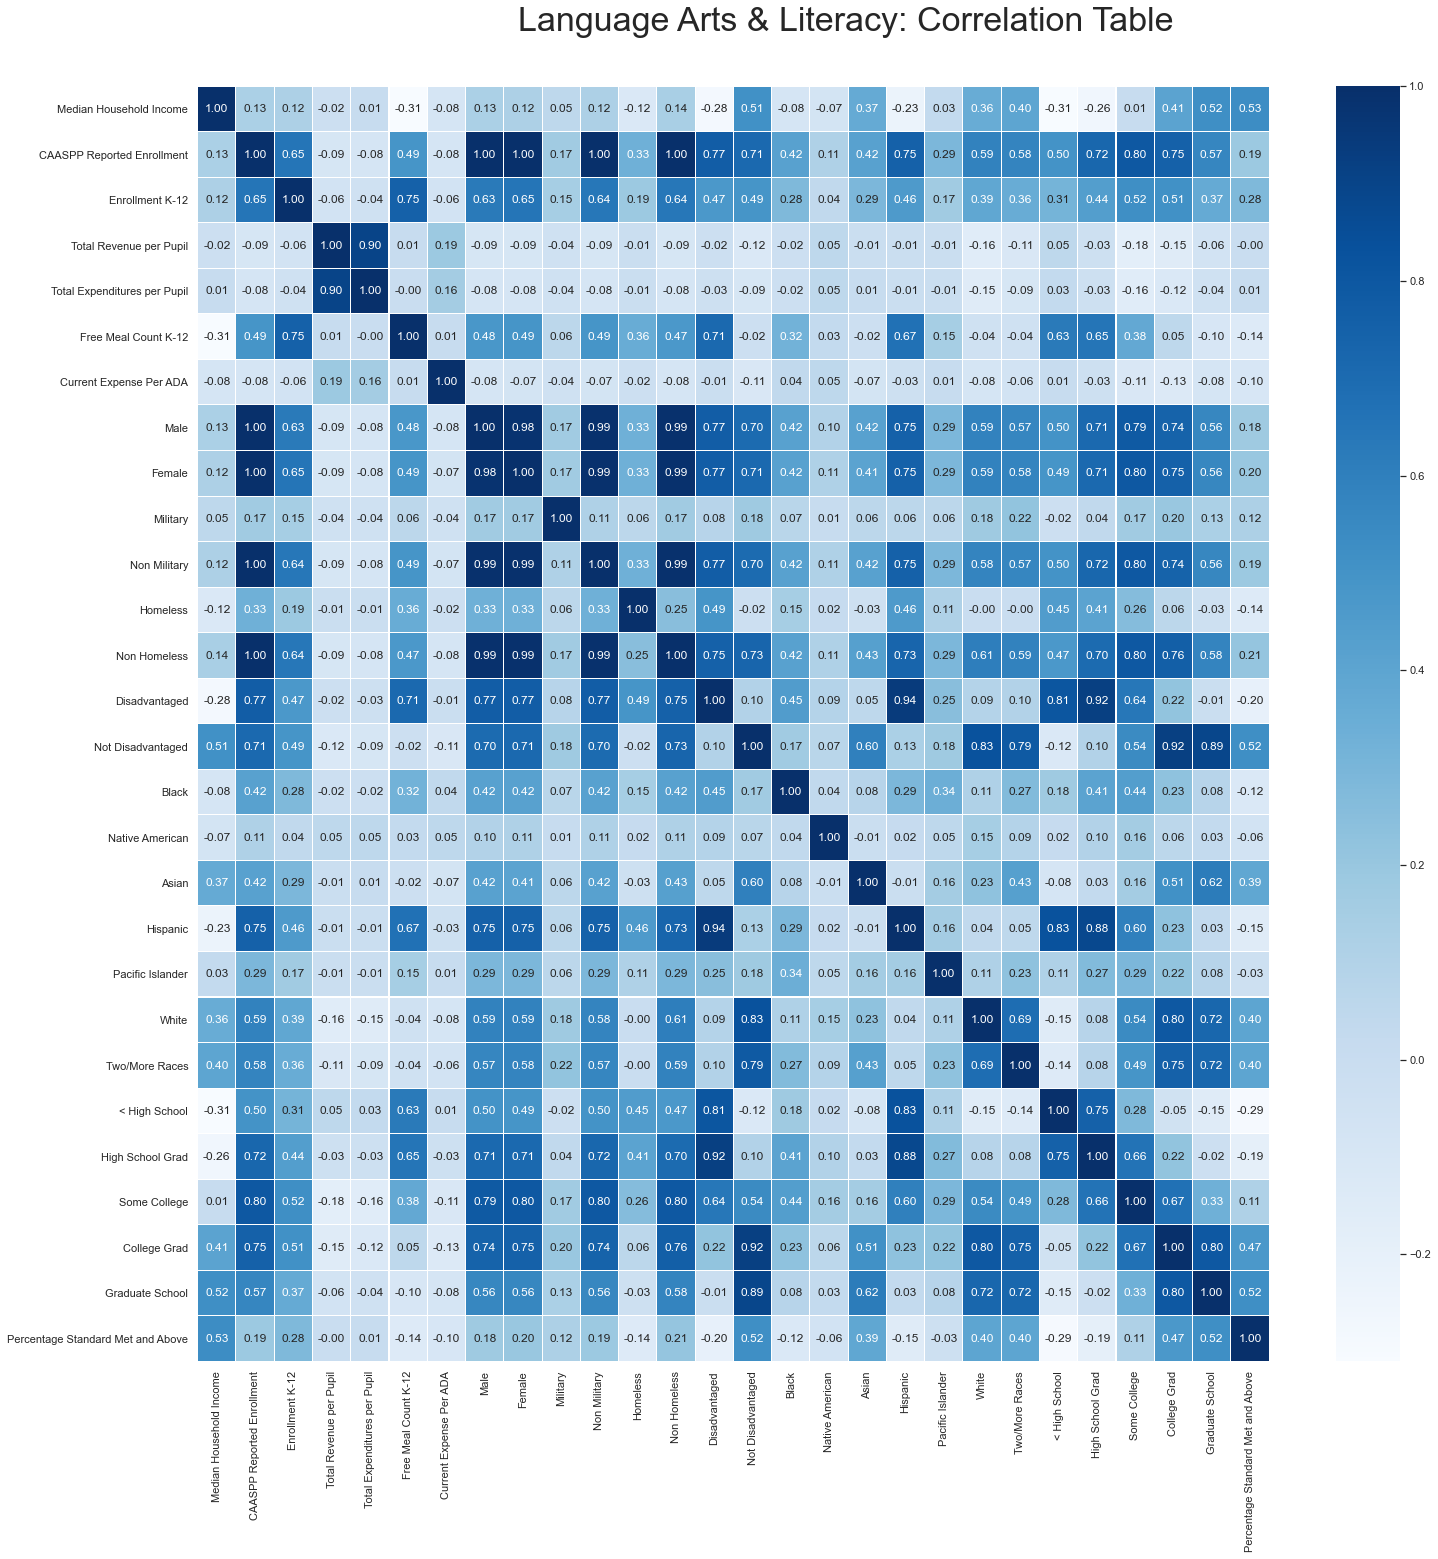

In [75]:
# Run correlation on table constructed with count instead of percentage values
corrmat = table.corr()
f, ax = plt.subplots(figsize=(24, 22))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="Blues",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Language Arts & Literacy: Correlation Table', fontsize=34)

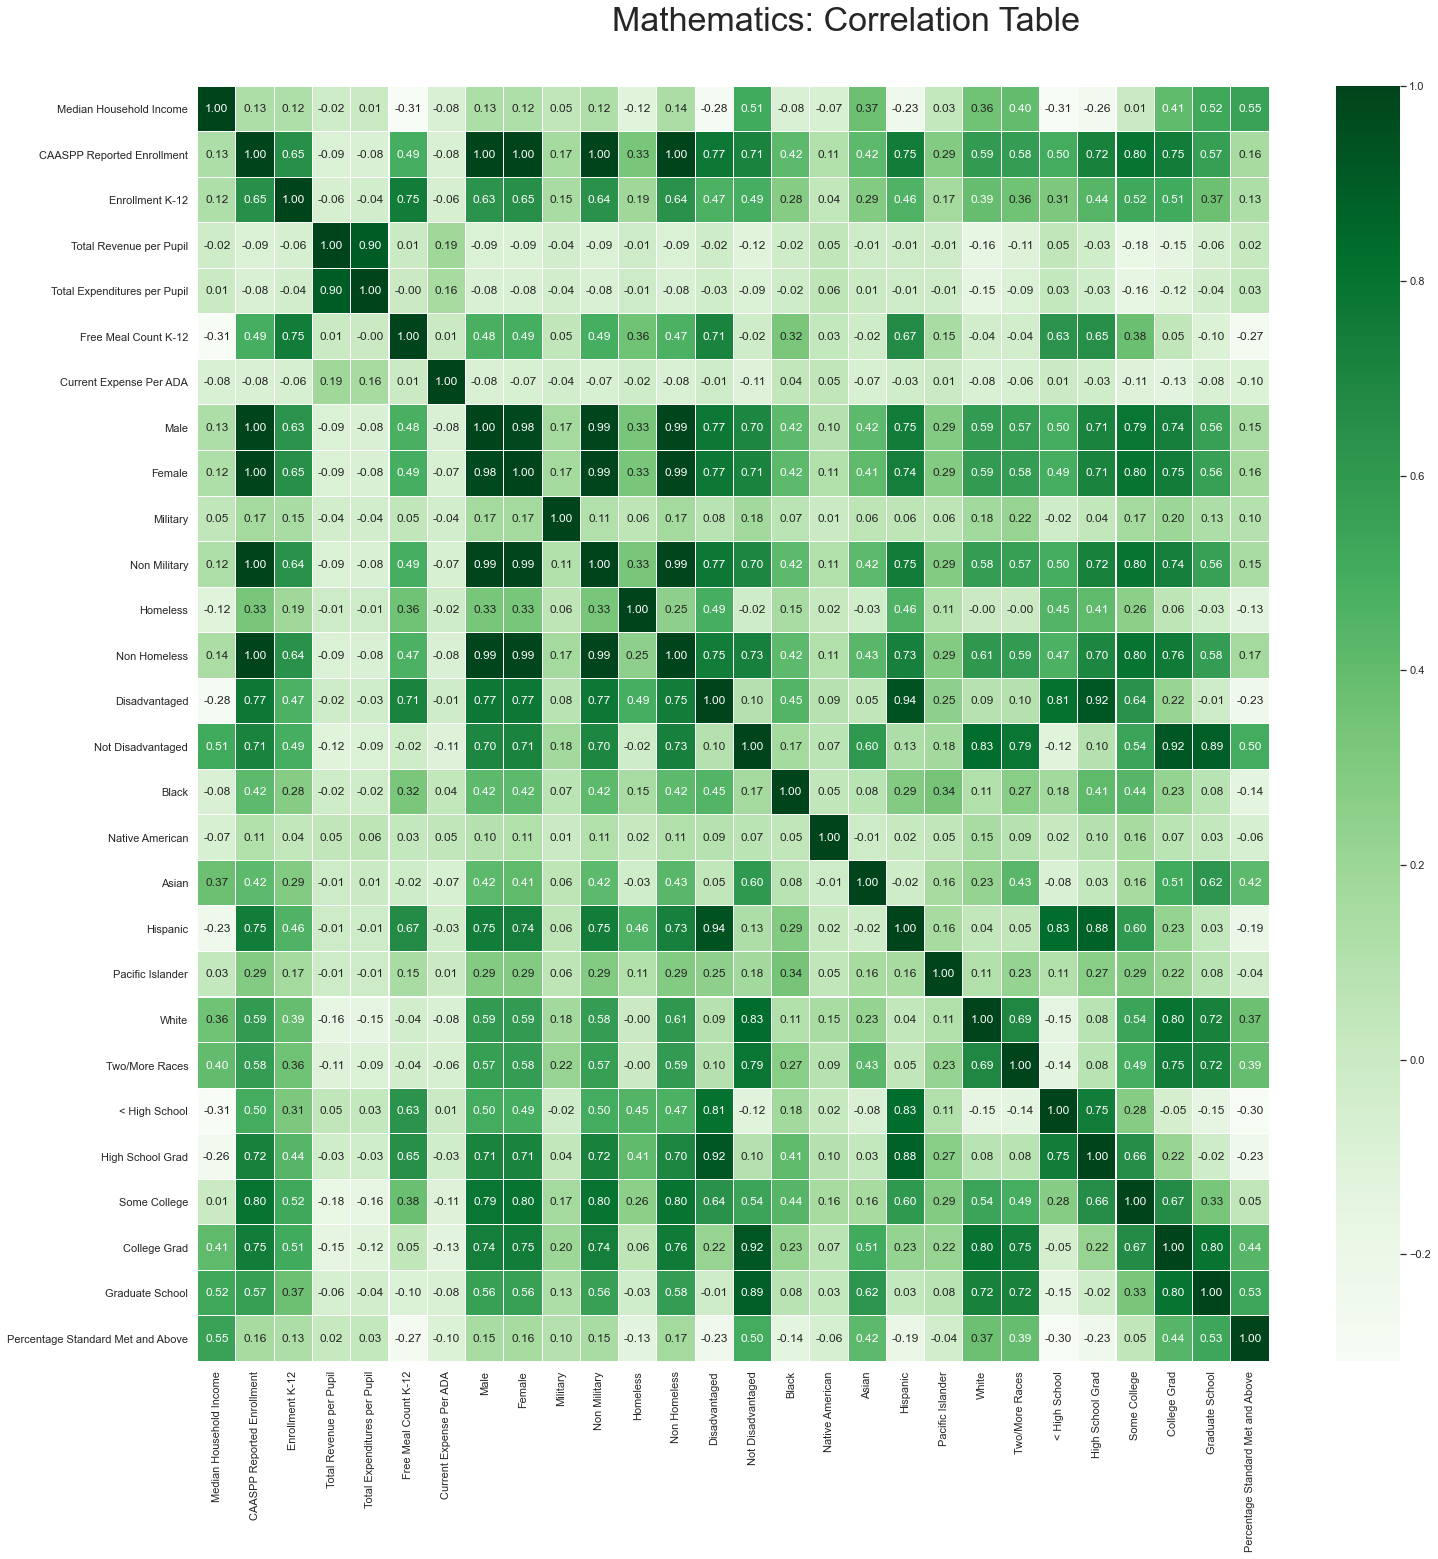

In [76]:
# Run correlation on table constructed with count instead of percentage values
corrmat = table1.corr()
f, ax = plt.subplots(figsize=(24, 22))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="Greens",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Mathematics: Correlation Table', fontsize=34)

## Pairplots

Another way of evaluating the variables distribution against each other.

1. Language Arts & Literature

In [9]:
# # Create a pairplot for all numeric variables 
# sns.pairplot(table,  palette='Set1')
# plt.show()

## Variables Distribution

### 1. Language Art & Literature

In [10]:
language

School Name  School Code  Zip Code  County Name  \
0       21st Century Learning Institute       129882     92223    Riverside   
1               A. E. Arnold Elementary      6027767     90630       Orange   
2                 A. G. Cook Elementary      6028211     92844       Orange   
3                   A. G. Currie Middle      6085377     92780       Orange   
4                A. J. Dorsa Elementary      6046114     95122  Santa Clara   
...                                 ...          ...       ...          ...   
9641                       iLEAD Online       136531     93510  Los Angeles   
9642                   iLead Agua Dulce       138297     91390  Los Angeles   
9643  iQ Academy California-Los Angeles       120600     93065  Los Angeles   
9644                        one.Charter       120717     95206  San Joaquin   
9645              �nimo Compton Charter       137984     90061  Los Angeles   

      County Code   Latitude   Longitude  Median Household Income  \
0            33.0  33.962281 -116.984589                  64738.0   
1            30.0  33.824900 -118.045700                  84051.0   
2            30.0  33.777700 -117.953000                  48345.0   
3            30.0  33.743100 -117.824900                  64089.0   
4            43.0  37.369388 -121.833560                  57470.0   
...           ...        ...         ...                      ...   
9641         19.0  34.472708 -118.196768                  89403.0   
9642         19.0  34.472708 -118.196768                 105659.0   
9643         19.0  33.985314 -117.888584                  94173.0   
9644         39.0   0.000000    0.000000                  42404.0   
9645         19.0  33.892300 -118.216200                  34566.0   

      CAASPP Reported Enrollment  Enrollment K-12  ...  Hispanic  \
0                           58.0             88.0  ...     56.90   
1                          447.0            739.0  ...     29.31   
2                          192.0            366.0  ...     22.40   
3                          585.0            611.0  ...     90.94   
4                          184.0            371.0  ...     90.22   
...                          ...              ...  ...       ...   
9641                        52.0             73.0  ...     26.92   
9642                        64.0            119.0  ...     37.50   
9643                       405.0            702.0  ...      8.89   
9644                       184.0            509.0  ...     60.87   
9645                        77.0             68.0  ...     55.84   

      Pacific Islander  White  Two/More Races  < High School  \
0                 0.00  31.03            0.00          10.34   
1                -0.22  24.83            1.57           3.36   
2                 0.00   5.21            3.12          -0.52   
3                -0.17   2.56           -0.17          38.12   
4                 0.00  -0.54           -0.54          44.57   
...                ...    ...             ...            ...   
9641              0.00  42.31           -1.92          -1.92   
9642              0.00  46.88           14.06           0.00   
9643              1.98  40.99            8.15           0.00   
9644             -0.54   8.70            7.07          34.24   
9645              0.00   0.00           -1.30          40.26   

      High School Grad  Some College  College Grad  Graduate School  \
0                22.41         37.93         15.52             6.90   
1                 9.84         19.02         30.87            27.07   
2                 6.77          7.29         17.19             3.12   
3                28.72         14.02          6.67             2.56   
4                29.89         13.04          8.15            -0.54   
...                ...           ...           ...              ...   
9641             -1.92         21.15         34.62            23.08   
9642             -1.56         26.56         25.00            15.62   
9643              2.22   

In [11]:
language.columns

Index(['School Name', 'School Code', 'Zip Code', 'County Name', 'County Code',
       'Latitude', 'Longitude', 'Median Household Income',
       'CAASPP Reported Enrollment', 'Enrollment K-12',
       'Total Revenue per Pupil', 'Total Expenditures per Pupil',
       'Free Meal Count K-12', 'Current Expense Per ADA', 'Male', 'Female',
       'Military', 'Non Military', 'Homeless', 'Non Homeless', 'Disadvantaged',
       'Not Disadvantaged', 'Black', 'Native American', 'Asian', 'Hispanic',
       'Pacific Islander', 'White', 'Two/More Races', '< High School',
       'High School Grad', 'Some College', 'College Grad', 'Graduate School',
       'Percentage Standard Met and Above'],
      dtype='object')

- Standard Met and Above Distribution:

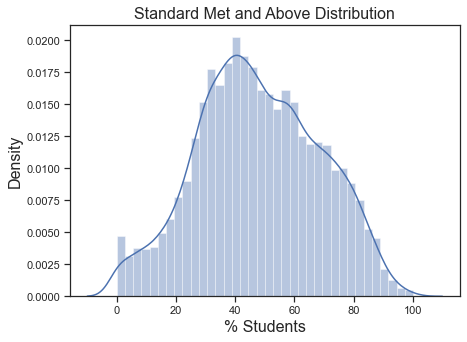

In [12]:
# Distribution plot
plt.figure(figsize=(7,5))
sns.distplot(language['Percentage Standard Met and Above'])
plt.title('Standard Met and Above Distribution', fontsize = 16)

# Adding labels
_ = plt.xlabel('% Students', fontsize=16)
_ = plt.ylabel('Density', fontsize=16)

plt.show()

- Ethnicity Distribution:

<Figure size 864x576 with 0 Axes>

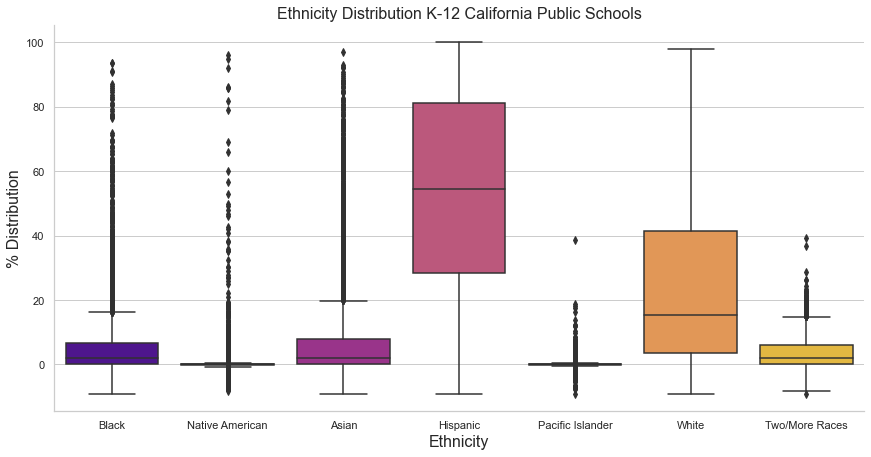

In [13]:
# Subset columns of interest
boxplot = language[['Black', 'Native American', 'Asian', 'Hispanic', 'Pacific Islander', 'White', 'Two/More Races']]

# Plot ethnicity distribution
plt.figure(figsize=(12,8))
sns.set_theme(style="whitegrid")
sns.catplot(data=boxplot, kind="box", height=6, aspect=2, palette="plasma")
_ = plt.title('Ethnicity Distribution K-12 California Public Schools', fontsize=16)
_ = plt.xlabel('Ethnicity', fontsize=16)
_ = plt.ylabel('% Distribution', fontsize=16)


- Median Household Income Distribution:

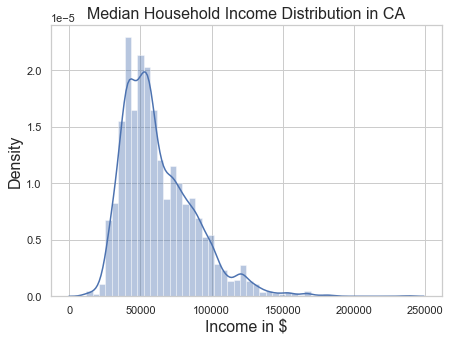

In [14]:
# Distribution plot
plt.figure(figsize=(7,5))
sns.distplot(language['Median Household Income'])
plt.title('Median Household Income Distribution in CA', fontsize = 16)

# Adding labels
_ = plt.xlabel('Income in $', fontsize=16)
_ = plt.ylabel('Density', fontsize=16)

plt.show()

- High income zip codes investigation:

In [15]:
high_income = language[language['Median Household Income'] > 155000]
high_income.head()

School Name  School Code  Zip Code   County Name  \
119           Alamo Elementary      6005060     94507  Contra Costa   
220          Almond Elementary      6047377     94022   Santa Clara   
428  Ardis G. Egan Junior High      6047385     94022   Santa Clara   
434        Argonaut Elementary      6049068     95070   Santa Clara   
857      Blue Hills Elementary      6067185     95070   Santa Clara   

     County Code   Latitude   Longitude  Median Household Income  \
119          7.0  37.812444 -121.977672                 163219.0   
220         43.0  37.371650 -122.106591                 182750.0   
428         43.0  37.371650 -122.106591                 182750.0   
434         43.0  37.255504 -122.031707                 167386.0   
857         43.0   0.000000    0.000000                 167386.0   

     CAASPP Reported Enrollment  Enrollment K-12  ...  Hispanic  \
119                       195.0            359.0  ...      9.23   
220                       271.0            488.0  ...     12.55   
428                       586.0            585.0  ...      9.90   
434                       185.0            344.0  ...      4.32   
857                       179.0            339.0  ...     -0.56   

     Pacific Islander  White  Two/More Races  < High School  High School Grad  \
119              0.00  63.59           12.82          -0.51             -0.51   
220             -0.37  36.53           10.70           4.06              3.69   
428             -0.17  44.71            9.73           2.56              2.56   
434              0.00  10.27            5.41           0.00              0.00   
857              0.00  16.20            8.94           0.00              0.00   

     Some College  College Grad  Graduate School  \
119          3.59         36.92            55.90   
220          1.85         15.13            74.54   
428          2.05         15.70            76.28   
434         -0.54          7.57            90.81   
857          2.23         21.23            75.42   

     Percentage Standard Met and Above  
119                              82.56  
220                              84.67  
428                              88.87  
434                              93.26  
857                              87.28  

[5 rows x 35 columns]

- Standard Met and Above in High Income Zip Codes:

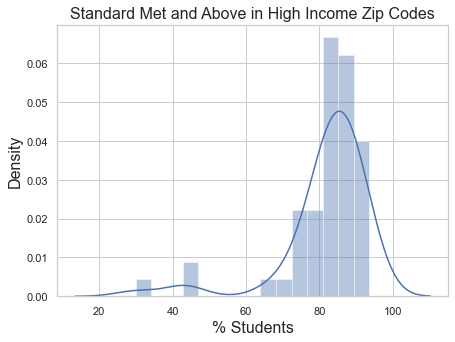

In [16]:
# Distribution plot
plt.figure(figsize=(7,5))
sns.distplot(high_income['Percentage Standard Met and Above'])
plt.title('Standard Met and Above in High Income Zip Codes', fontsize = 16)

# Adding labels
_ = plt.xlabel('% Students', fontsize=16)
_ = plt.ylabel('Density', fontsize=16)

plt.show()

- Parents Education Distribution in High Income Zip Codes:

Text(10.184266666666673, 0.5, 'Density')

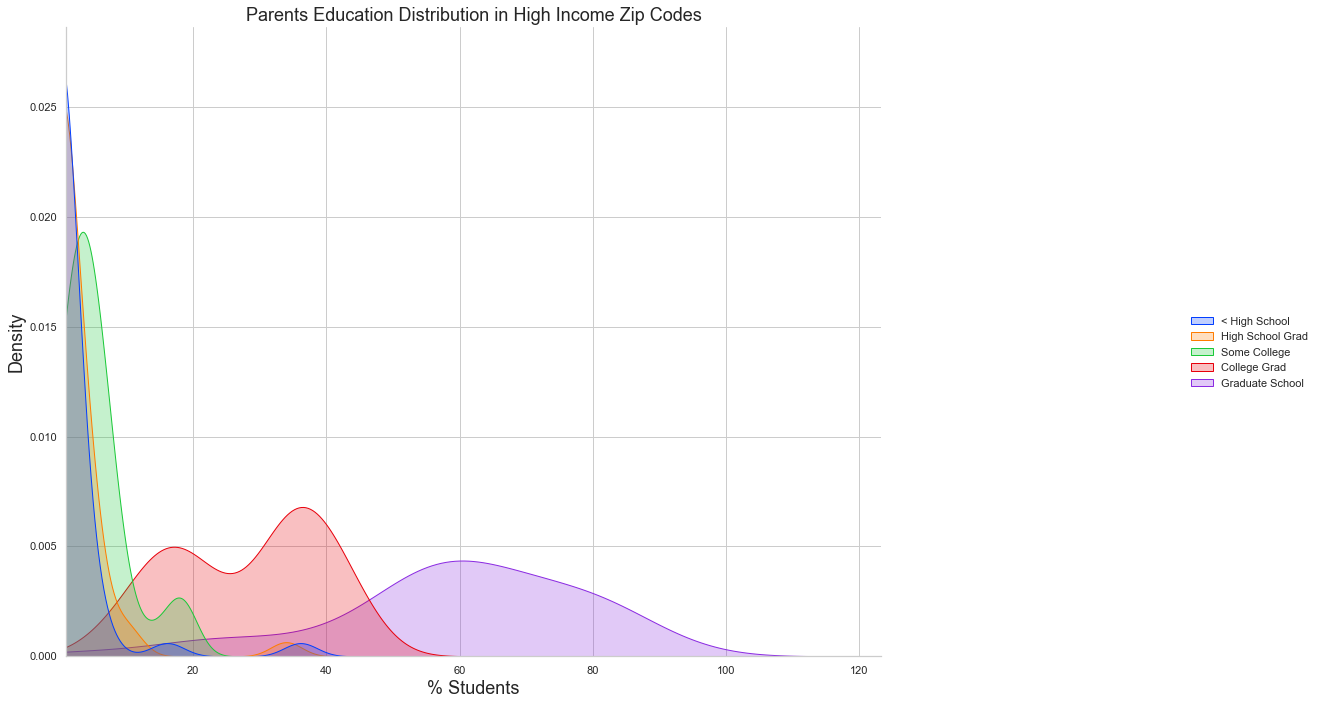

In [17]:
# Subset columns of interest
boxplot0 = high_income[['< High School', 'High School Grad','Some College', 'College Grad', 'Graduate School']]

# distribution plot
_ = sns.displot(boxplot0, kind="kde", fill=True, palette="bright")
_.fig.set_size_inches(20,10)
plt.title("Parents Education Distribution in High Income Zip Codes", fontsize=18)
plt.xlim(xmin=1)
plt.xlabel('% Students', fontsize=18)
plt.ylabel('Density', fontsize=18)

- Students Ethinicity Distribution in High Income Zip Codes:

Text(9.722947222222231, 0.5, 'Density')

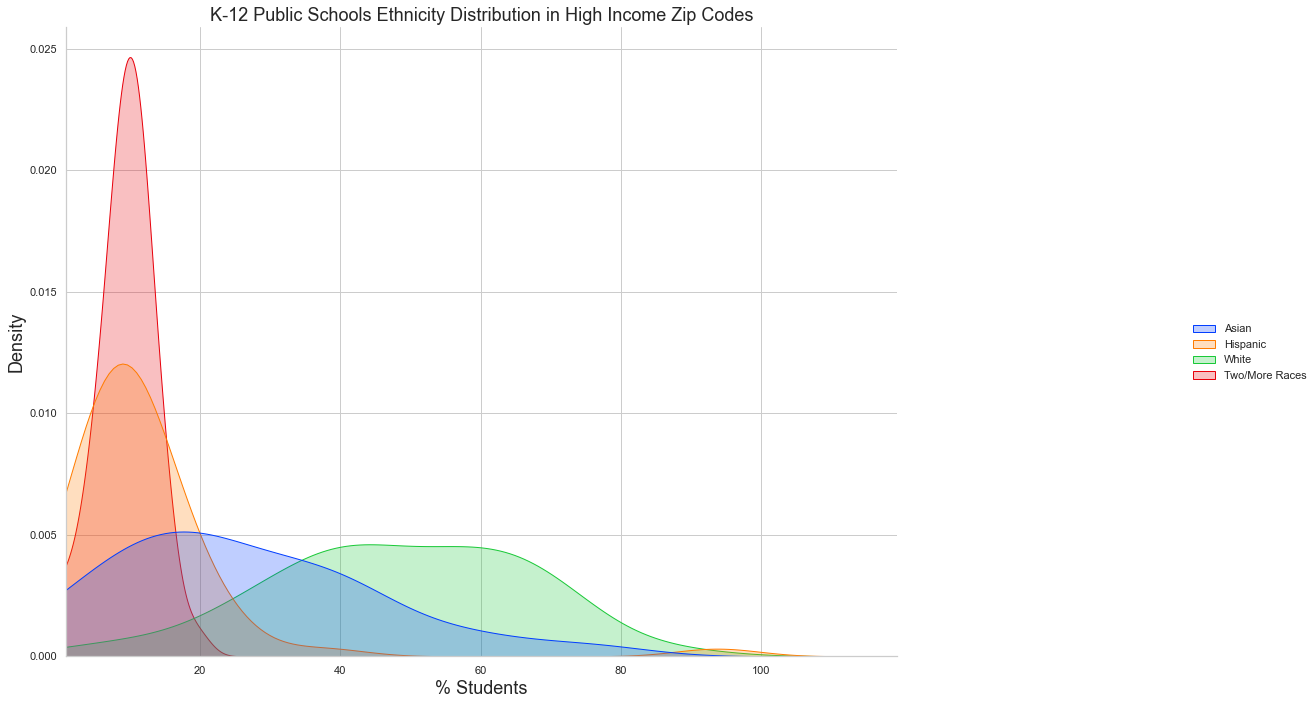

In [18]:
# Subset columns of interest
ethnicity_HI = high_income[['Asian', 'Hispanic','White', 'Two/More Races']]

# distribution plot
_ = sns.displot(ethnicity_HI, kind="kde", fill=True, palette="bright")
_.fig.set_size_inches(20,10)
plt.title("K-12 Public Schools Ethnicity Distribution in High Income Zip Codes", fontsize=18)
plt.xlim(xmin=1)
plt.xlabel('% Students', fontsize=18)
plt.ylabel('Density', fontsize=18)

Text(21.623877777777786, 0.5, 'Density')

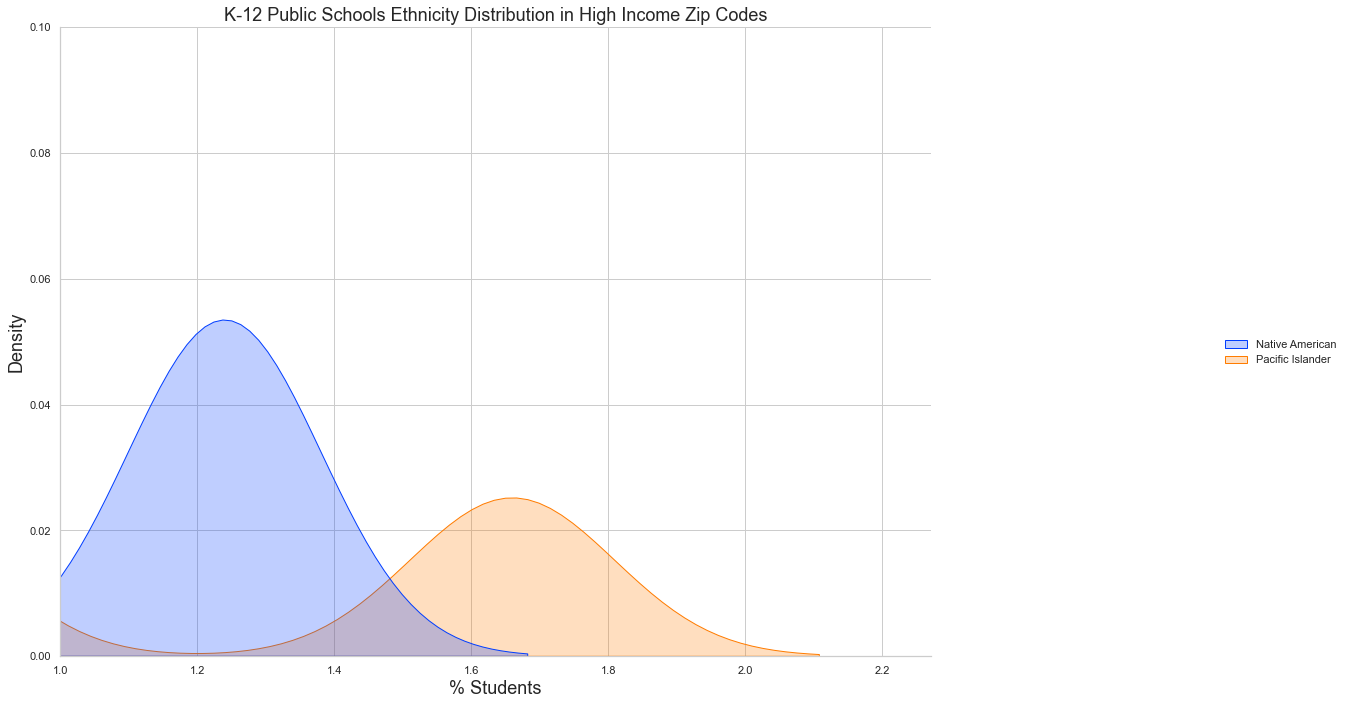

In [19]:
# Subset columns of interest
ethnicity_HI1 = high_income[['Native American', 'Pacific Islander']]

# distribution plot
_ = sns.displot(ethnicity_HI1, kind="kde", fill=True, palette="bright")
_.fig.set_size_inches(20,10)
plt.title("K-12 Public Schools Ethnicity Distribution in High Income Zip Codes", fontsize=18)
plt.xlim(xmin=1)
plt.ylim(ymax=0.1)
plt.xlabel('% Students', fontsize=18)
plt.ylabel('Density', fontsize=18)

Text(9.982600000000005, 0.5, 'Density')

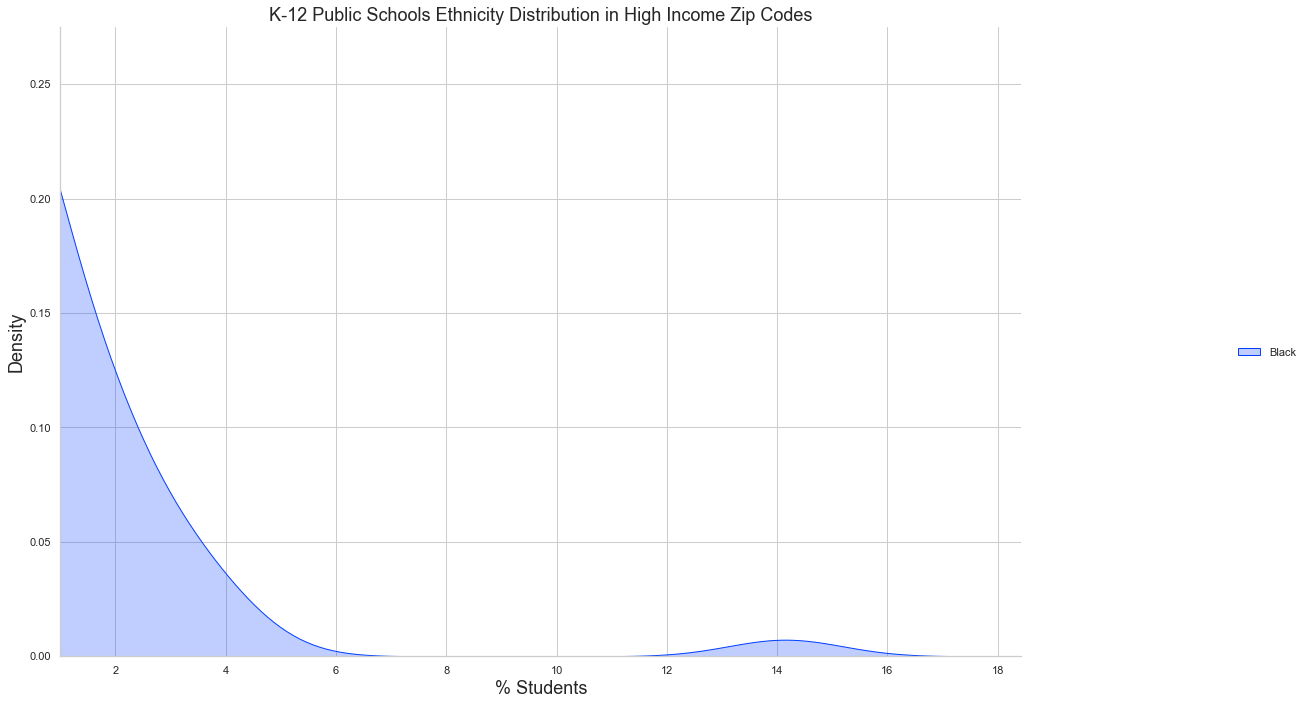

In [20]:
# Subset columns of interest
ethnicity_HI2 = high_income[['Black']]

# distribution plot
_ = sns.displot(ethnicity_HI2, kind="kde", fill=True, palette="bright")
_.fig.set_size_inches(20,10)
plt.title("K-12 Public Schools Ethnicity Distribution in High Income Zip Codes", fontsize=18)
plt.xlim(xmin=1)
plt.xlabel('% Students', fontsize=18)
plt.ylabel('Density', fontsize=18)

- Low Income Zip Codes Investigation:

In [21]:
low_income = language[language['Median Household Income'] < 30000]
low_income.head()

School Name  School Code  Zip Code  County Name  \
5          A. L. Conner Elementary       105692     93646       Fresno   
21            ASPIRE Community Day       132167     92543    Riverside   
41                   Acacia Middle      6084628     92543    Riverside   
57                     Accelerated      6112536     90037  Los Angeles   
60  Accelerated Charter Elementary       100743     90037  Los Angeles   

    County Code  Latitude   Longitude  Median Household Income  \
5          10.0  36.59673 -119.453485                  27914.0   
21         33.0  33.74370 -116.990200                  27163.0   
41         33.0  33.74370 -116.990200                  27163.0   
57         19.0  34.05628 -118.257240                  26638.0   
60         19.0  34.05628 -118.257240                  26638.0   

    CAASPP Reported Enrollment  Enrollment K-12  ...  Hispanic  \
5                        172.0            332.0  ...     96.51   
21                        46.0             73.0  ...     63.04   
41                       815.0            811.0  ...     65.28   
57                       542.0            787.0  ...     97.23   
60                       263.0            501.0  ...     99.62   

    Pacific Islander  White  Two/More Races  < High School  High School Grad  \
5                0.0  -0.58           -0.58          34.30             31.40   
21               0.0  13.04           -2.17          19.57             45.65   
41               0.0  15.58            5.28          28.34             32.02   
57               0.0   0.00            0.00          33.95             31.00   
60               0.0  -0.38            0.00          37.64             29.28   

    Some College  College Grad  Graduate School  \
5          19.19          9.88            -0.58   
21         26.09         -2.17            -2.17   
41         28.22         10.06             1.35   
57         16.61          5.35             3.69   
60         13.31          5.32             3.42   

    Percentage Standard Met and Above  
5                               45.88  
21                               6.98  
41                              28.20  
57                              43.95  
60                              46.95  

[5 rows x 35 columns]

- Standard Met and Above in Low Income Zip Codes:

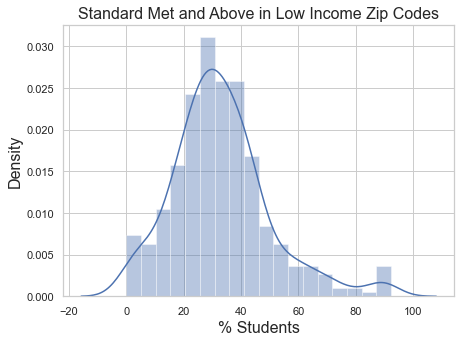

In [22]:
# Distribution plot
plt.figure(figsize=(7,5))
sns.distplot(low_income['Percentage Standard Met and Above'])
plt.title('Standard Met and Above in Low Income Zip Codes', fontsize = 16)

# Adding labels
_ = plt.xlabel('% Students', fontsize=16)
_ = plt.ylabel('Density', fontsize=16)

plt.show()

- Parents Education Distribution in Low Income Zip Codes:

Text(10.184266666666673, 0.5, 'Density')

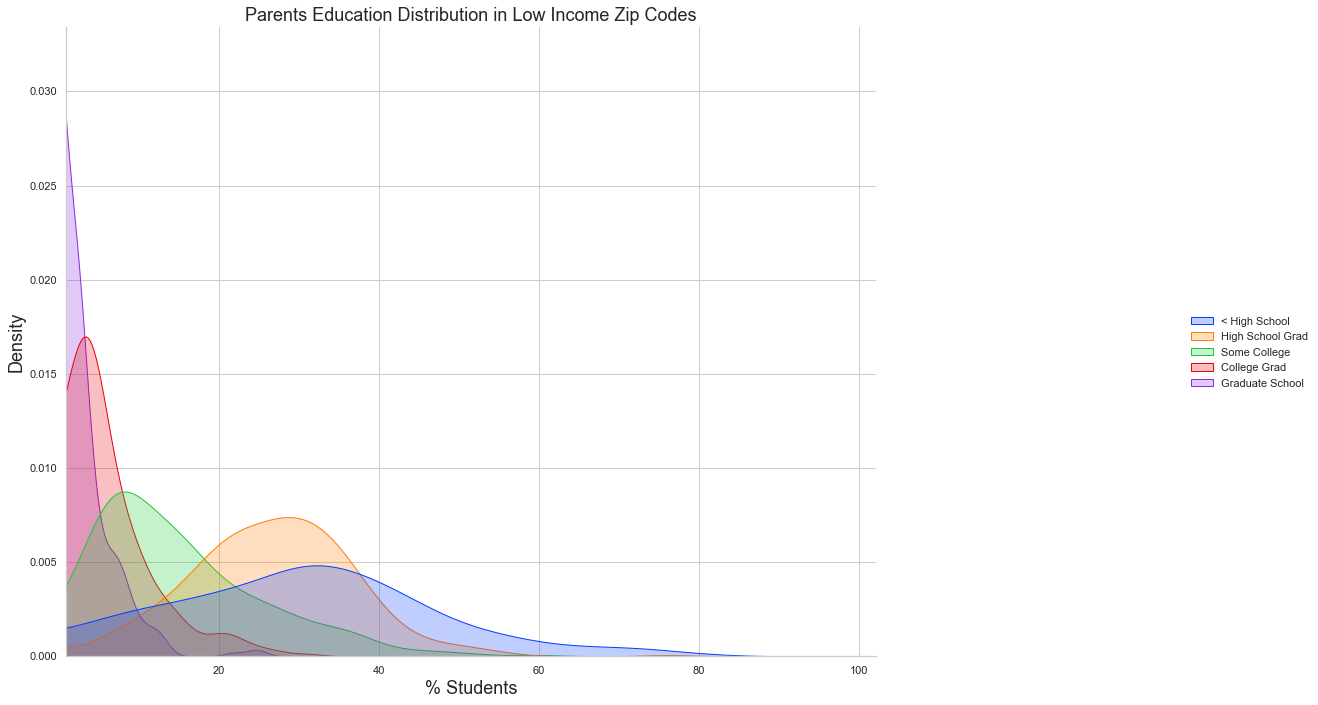

In [23]:
# Subset columns of interest
low0 = low_income[['< High School', 'High School Grad','Some College', 'College Grad', 'Graduate School']]

# distribution plot
_ = sns.displot(low0, kind="kde", fill=True, palette="bright")
_.fig.set_size_inches(20,10)
plt.title("Parents Education Distribution in Low Income Zip Codes", fontsize=18)
plt.xlim(xmin=1)
plt.xlabel('% Students', fontsize=18)
plt.ylabel('Density', fontsize=18)

- Students Ethnicity Distribution in Low Income Zip Codes:

Text(5.452447222222226, 0.5, 'Density')

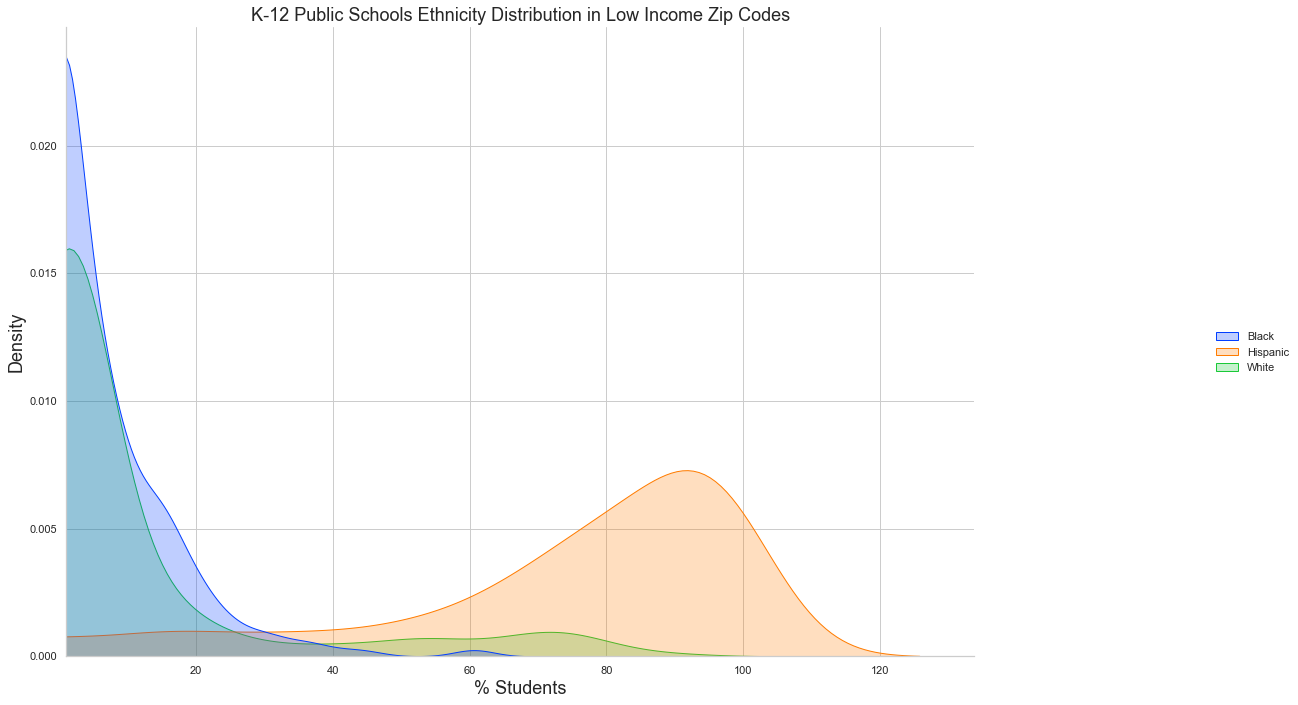

In [24]:
# Subset columns of interest
ethnicity_LO = low_income[['Black', 'Hispanic','White']]

# distribution plot
_ = sns.displot(ethnicity_LO, kind="kde", fill=True, palette="bright")
_.fig.set_size_inches(20,10)
plt.title("K-12 Public Schools Ethnicity Distribution in Low Income Zip Codes", fontsize=18)
plt.xlim(xmin=1)
plt.xlabel('% Students', fontsize=18)
plt.ylabel('Density', fontsize=18)

Text(15.847947222222231, 0.5, 'Density')

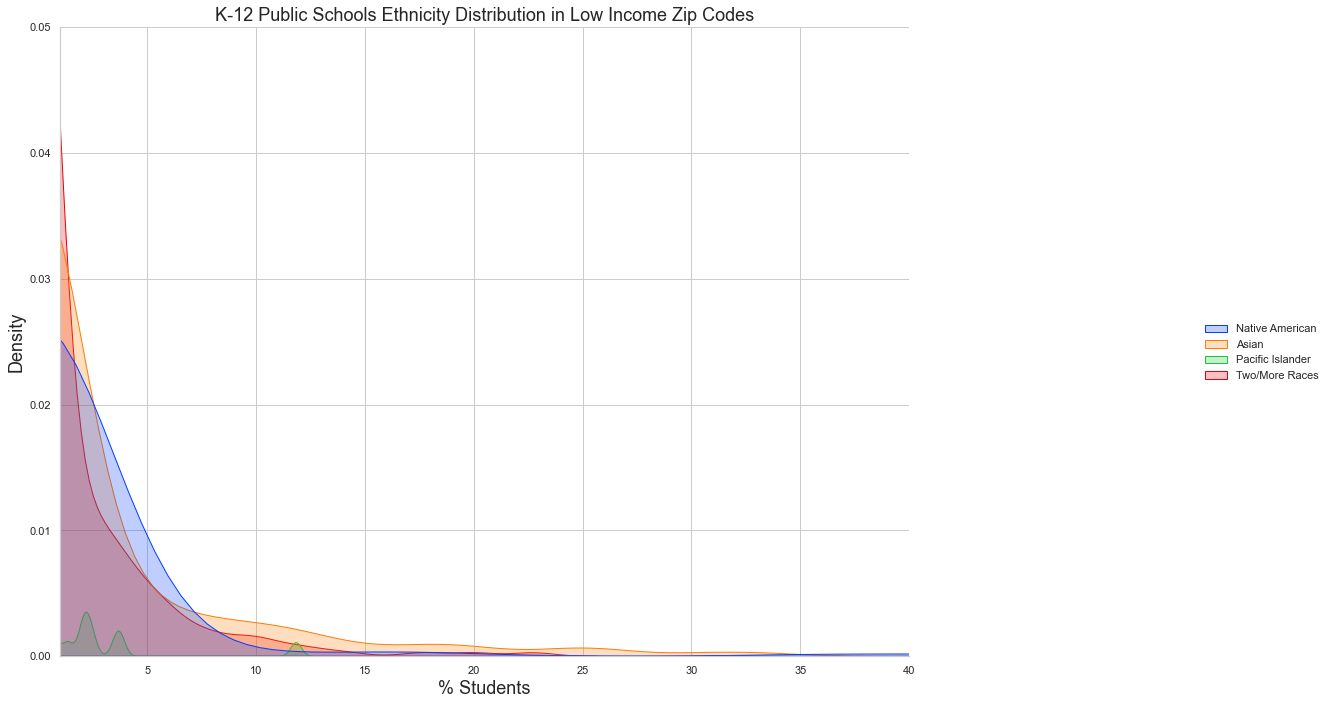

In [25]:
# Subset columns of interest
ethnicity_LO1 = low_income[['Native American', 'Asian', 'Pacific Islander', 'Two/More Races']]

# distribution plot
_ = sns.displot(ethnicity_LO1, kind="kde", fill=True, palette="bright")
_.fig.set_size_inches(20,10)
plt.title("K-12 Public Schools Ethnicity Distribution in Low Income Zip Codes", fontsize=18)
plt.xlim(xmin=1, xmax=40)
plt.ylim(ymax=0.05)
plt.xlabel('% Students', fontsize=18)
plt.ylabel('Density', fontsize=18)

- CAASPP Reported Enrollment Distribution:

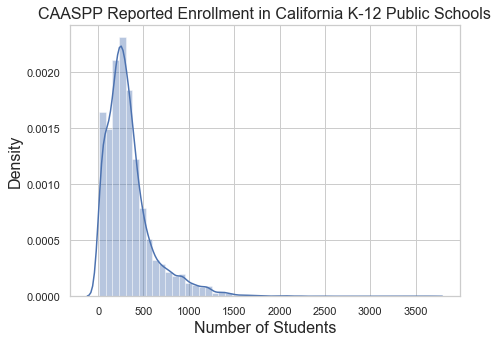

In [26]:
# Distribution plot
plt.figure(figsize=(7,5))
sns.distplot(language['CAASPP Reported Enrollment'])
plt.title('CAASPP Reported Enrollment in California K-12 Public Schools', fontsize = 16)

# Adding labels
_ = plt.xlabel('Number of Students', fontsize=16)
_ = plt.ylabel('Density', fontsize=16)

plt.show()

- Total Revenue Per Pupil Distribution:

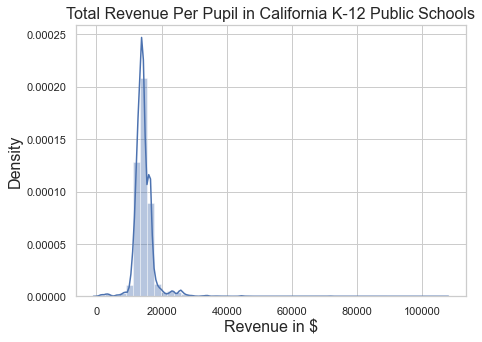

In [27]:
# Distribution plot
plt.figure(figsize=(7,5))
sns.distplot(language['Total Revenue per Pupil'])
plt.title('Total Revenue Per Pupil in California K-12 Public Schools', fontsize = 16)

# Adding labels
_ = plt.xlabel('Revenue in $', fontsize=16)
_ = plt.ylabel('Density', fontsize=16)

plt.show()

- High Revenue Per Pupil Investigation:

In [28]:
high_revenue = language[language['Total Revenue per Pupil'] > 30000]
high_revenue.head()

School Name  School Code  Zip Code    County Name  \
553             August Boeger Middle      6048037     95148    Santa Clara   
1057          Burnt Ranch Elementary      6053680     95527        Trinity   
1267  Captain John Continuation High      1230028     95546       Humboldt   
1710          Cold Spring Elementary      6045348     93108  Santa Barbara   
2178       Diamond Valley Elementary      6002794     96120         Alpine   

      County Code   Latitude   Longitude  Median Household Income  \
553          43.0  37.348329 -121.800763                 107324.0   
1057         53.0  40.808949 -123.479719                  34911.0   
1267         12.0  41.049066 -123.676507                  26281.0   
1710         42.0  34.441188 -119.659773                 125272.0   
2178          2.0  38.766563 -119.809131                  61157.0   

      CAASPP Reported Enrollment  Enrollment K-12  ...  Hispanic  \
553                        539.0            556.0  ...     74.40   
1057                        55.0             84.0  ...     23.64   
1267                        22.0             33.0  ...      0.00   
1710                        99.0            169.0  ...     12.12   
2178                        54.0             77.0  ...     -1.85   

      Pacific Islander  White  Two/More Races  < High School  \
553               1.48   2.60            0.74          32.84   
1057              0.00  43.64           -1.82          -1.82   
1267              0.00  -4.55           -4.55           0.00   
1710              0.00  79.80           -1.01           0.00   
2178              0.00  44.44           -1.85           0.00   

      High School Grad  Some College  College Grad  Graduate School  \
553              34.32         11.69         12.99             2.97   
1057             23.64         32.73         25.45            -1.82   
1267             50.00         22.73         -4.55            -4.55   
1710             -1.01         21.21         35.35            40.40   
2178             20.37         22.22         20.37            -1.85   

      Percentage Standard Met and Above  
553                               44.62  
1057                              58.18  
1267                               0.00  
1710                              92.63  
2178                              50.00  

[5 rows x 35 columns]

note: There are 32 schools with revenue per pupil higher than 30,000

- Standard Met and Above in High Revenue Schools:

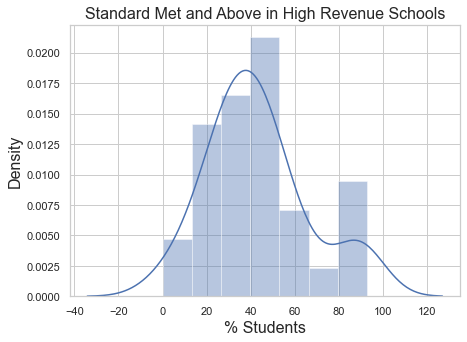

In [29]:
# Distribution plot
plt.figure(figsize=(7,5))
sns.distplot(high_revenue['Percentage Standard Met and Above'])
plt.title('Standard Met and Above in High Revenue Schools', fontsize = 16)

# Adding labels
_ = plt.xlabel('% Students', fontsize=16)
_ = plt.ylabel('Density', fontsize=16)

plt.show()

--------

## Unusual Data Identified:
- There are 10 schools where total revenue per pupil is larger than 40,000
    - Percentage of students passing the standard is not higher than average

In [30]:
unusual_high_revenue = language[language['Total Revenue per Pupil'] > 40000]
unusual_high_revenue

School Name  School Code  Zip Code County Name  \
1267  Captain John Continuation High      1230028     95546    Humboldt   
2343       Eagle Mountain Elementary      6031900     92239   Riverside   
3567              Hayfork Elementary      6053730     96041     Trinity   
3568                    Hayfork High      5337407     96041     Trinity   
3801         Hoopa Valley Elementary      6007967     95546    Humboldt   
3802               Hoopa Valley High      1234004     95546    Humboldt   
4033          Jack Norton Elementary      6007983     95546    Humboldt   
5293                Maple Elementary      6009732     93263        Kern   
6454              Orleans Elementary      6007975     95556    Humboldt   
8669       Trinity Valley Elementary      6007991     95573    Humboldt   

      County Code   Latitude   Longitude  Median Household Income  \
1267         12.0  41.049066 -123.676507                  26281.0   
2343         33.0  33.850036 -115.473811                  55750.0   
3567         53.0  40.551285 -123.170660                  26827.0   
3568         53.0  40.551285 -123.170660                  26827.0   
3801         12.0  41.049066 -123.676507                  26281.0   
3802         12.0  41.049066 -123.676507                  26281.0   
4033         12.0  41.049066 -123.676507                  26281.0   
5293         15.0  35.513343 -119.334381                  40833.0   
6454         12.0  41.049066 -123.676507                  48839.0   
8669         12.0  41.049066 -123.676507                  35607.0   

      CAASPP Reported Enrollment  Enrollment K-12  ...  Hispanic  \
1267                        22.0             33.0  ...      0.00   
2343                        17.0             29.0  ...     52.94   
3567                       127.0            176.0  ...     11.81   
3568                        16.0             72.0  ...     -6.25   
3801                       296.0            425.0  ...      2.70   
3802                        50.0            243.0  ...     -2.00   
4033                        19.0             34.0  ...     -5.26   
5293                       194.0            292.0  ...     68.56   
6454                        45.0             86.0  ...     -2.22   
8669                       119.0            184.0  ...     10.92   

      Pacific Islander  White  Two/More Races  < High School  \
1267              0.00  -4.55           -4.55           0.00   
2343              0.00  29.41           -5.88          -5.88   
3567              0.00  56.69           10.24           9.45   
3568              0.00  50.00           -6.25          -6.25   
3801             -0.34   2.70           -0.34           3.72   
3802              0.00   8.00           -2.00          -2.00   
4033              0.00  -5.26            0.00          -5.26   
5293              0.00  31.44            0.00           8.76   
6454              0.00  17.78           -2.22           0.00   
8669             -0.84  27.73            5.04           6.72   

      High School Grad  Some College  College Grad  Graduate School  \
1267             50.00         22.73         -4.55            -4.55   
2343             52.94         23.53         -5.88             0.00   
3567             31.50         35.43          7.09            -0.79   
3568             -6.25         37.50         -6.25             0.00   
3801             36.15         36.49         13.85             6.76   
3802             34.00         32.00         18.00             8.00   
4033             52.63         -5.26         -5.26             0.00   
5293             24.23         32.99         21.13            10.31   
6454             24.44         42.22         17.78            13.33   
8669             35.29         32.77         10.08            10.08   

      Percentage Standard Met and Above  
1267                               0.00  
2343                              37.50  
3567                              42.62  
3568                              5

- There are 98 schools with 0 students meeting the standards:

In [31]:
missing_yvalue = language[language['Percentage Standard Met and Above'] == 0]
missing_yvalue

School Name  School Code  Zip Code  \
105                                Ahwahnee High      2030039     93644   
144                                   Alessandro       105940     92553   
157      Alhambra Unified District Level Program      1975713     91803   
397       Antioch Unified District Level Program       761648     94509   
402                                  Apollo High      5634993     93065   
...                                          ...          ...       ...   
8705              Turner Academy at Tokay Colony       125369     95240   
8741  Twin Rivers Unified District Level Program      3476505     95652   
9031                   Vista High (Continuation)      3930054     95320   
9225                    Wellington M. Smith, Jr.      2730117     93906   
9634                             Zoe Barnum High      1232057     95501   

       County Name  County Code   Latitude   Longitude  \
105         Madera         20.0  37.329424 -119.636405   
144      Riverside         33.0  33.917400 -117.215200   
157    Los Angeles         19.0  34.082200 -118.140400   
397   Contra Costa          7.0  38.014400 -121.813800   
402        Ventura         56.0  34.279529 -118.781520   
...            ...          ...        ...         ...   
8705   San Joaquin         39.0  38.123943 -121.248537   
8741    Sacramento         34.0  38.659870 -121.388701   
9031   San Joaquin         39.0  37.799871 -120.996330   
9225      Monterey         27.0   0.000000    0.000000   
9634      Humboldt         12.0   0.000000    0.000000   

      Median Household Income  CAASPP Reported Enrollment  Enrollment K-12  \
105                   44223.0                        18.0             33.0   
144                   42984.0                        31.0             50.0   
157                   56632.0                        30.0              0.0   
397                   54372.0                        51.0              0.0   
402                   94173.0                        57.0            114.0   
...                       ...                         ...              ...   
8705                  40021.0                        24.0             25.0   
8741                  46667.0                        45.0              0.0   
9031                  55599.0                        24.0             25.0   
9225                  55082.0                        28.0             76.0   
9634                  38175.0                        35.0             62.0   

      ...  Hispanic  Pacific Islander  White  Two/More Races  < High School  \
105   ...     33.33              0.00  61.11            0.00          -5.56   
144   ...     58.06              0.00  12.90            0.00          16.13   
157   ...     70.00             -3.33  -3.33            0.00          -3.33   
397   ...     29.41              0.00  25.49           -1.96          -1.96   
402   ...     70.18              0.00  26.32           -1.75          33.33   
...   ...       ...               ...    ...             ...            ...   
8705  ...     29.17              0.00  50.00            0.00          -4.17   
8741  ...     24.44              0.00  28.89           17.78          22.22   
9031  ...     70.83              0.00  29.17            0.00          29.17   
9225  ...     85.71              0.00   0.00           -3.57          53.57   
9634  ...     -2.86             -2.86  37.14           17.14          -2.86   

      High School Grad  Some College  College Grad  Graduate School  \
105              33.33         44.44          0.00             0.00   
144              25.81         45.16         12.90             0.00   
157              33.33         26.67         -3.33            -3.33   
397              -1.96         -1.96         -1.96            -1.96   
402              29.82         14.04          8.77            -1.75   
...                ...           ...           ...              ...   
8705             33.33         37.50         -4.17      

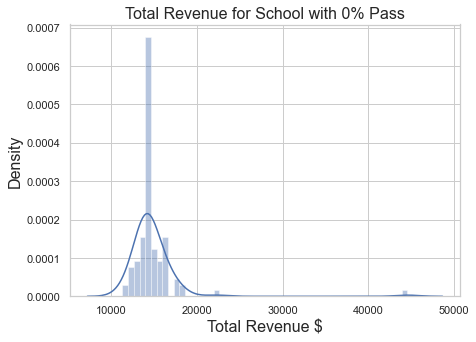

In [32]:
# Distribution plot
plt.figure(figsize=(7,5))
sns.distplot(missing_yvalue['Total Revenue per Pupil'])
plt.title('Total Revenue for School with 0% Pass', fontsize = 16)

# Adding labels
_ = plt.xlabel('Total Revenue $', fontsize=16)
_ = plt.ylabel('Density', fontsize=16)

plt.show()  

----------

- Total Expenditure Per Pupil Investigation:

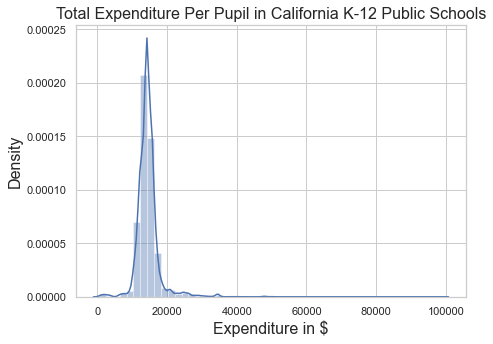

In [33]:
# Distribution plot
plt.figure(figsize=(7,5))
sns.distplot(language['Total Expenditures per Pupil'])
plt.title('Total Expenditure Per Pupil in California K-12 Public Schools', fontsize = 16)

# Adding labels
_ = plt.xlabel('Expenditure in $', fontsize=16)
_ = plt.ylabel('Density', fontsize=16)

plt.show()  

- High Expenditure Per Pupil Investigation:

In [34]:
high_expenditure = language[language['Total Expenditures per Pupil'] > 30000]
high_expenditure

School Name  School Code  Zip Code  County Name  \
387      Anthony C. Traina Elementary       105718     95377  San Joaquin   
553              August Boeger Middle      6048037     95148  Santa Clara   
674                          Bayshore      6043392     94014    San Mateo   
757    Benjamin Franklin Intermediate      6043723     94015    San Mateo   
1031  Buena Vista High (Continuation)      1530138     93268         Kern   
...                               ...          ...       ...          ...   
8900             Van Duzen Elementary      6053805     95526      Trinity   
9251            West Marin Elementary      6024954     94956        Marin   
9284              Westlake Elementary      6043905     94015    San Mateo   
9547        Woodrow Wilson Elementary      6043913     94014    San Mateo   
9559              Woodside Elementary      6045165     94062    San Mateo   

      County Code   Latitude   Longitude  Median Household Income  \
387          39.0  36.510594 -121.078124                  96860.0   
553          43.0  37.348329 -121.800763                 107324.0   
674          41.0  37.705349 -122.414198                  71668.0   
757          41.0  36.510594 -121.078124                  78564.0   
1031         15.0  35.146256 -119.460383                  46615.0   
...           ...        ...         ...                      ...   
8900         53.0  40.455370 -123.528762                  21979.0   
9251         21.0  38.245420 -122.903650                  38750.0   
9284         41.0  36.510594 -121.078124                  78564.0   
9547         41.0  36.510594 -121.078124                  71668.0   
9559         41.0  37.428120 -122.258800                 126557.0   

      CAASPP Reported Enrollment  Enrollment K-12  ...  Hispanic  \
387                        519.0            764.0  ...     38.73   
553                        539.0            556.0  ...     74.40   
674                        260.0            379.0  ...     39.23   
757                        678.0            691.0  ...     32.30   
1031                        24.0             75.0  ...     66.67   
...                          ...              ...  ...       ...   
8900                        42.0             65.0  ...     14.29   
9251                       130.0            153.0  ...     53.85   
9284                       159.0            377.0  ...     26.42   
9547                       185.0            376.0  ...     53.51   
9559                       289.0            408.0  ...     11.76   

      Pacific Islander  White  Two/More Races  < High School  \
387               1.93  21.77            5.78           4.43   
553               1.48   2.60            0.74          32.84   
674               5.38   2.31            5.38          16.15   
757               1.18   9.88            5.01           6.19   
1031              0.00  33.33            0.00          41.67   
...                ...    ...             ...            ...   
8900              0.00  66.67           11.90          -2.38   
9251              0.00  45.38           -0.77          22.31   
9284              0.00  14.47            5.03          -0.63   
9547             -0.54   5.41            4.32           9.19   
9559              1.73  69.20           11.07           1.73   

      High School Grad  Some College  College Grad  Graduate School  \
387              16.18         33.14         30.64            12.52   
553              34.32         11.69         12.99             2.97   
674              28.08         29.23         17.31             3.46   
757              25.07         22.71         29.79             6.49   
1031             45.83         -4.17          0.00             0.00   
...                ...           ...           ...              ...   
8900             14.29          9.52         -2.38            -2.38   
9251             20.77         -0.77         22.31            17.69   
9284             20.75         18.24         31

- Median Household Income Distribution in High Expenditure Schools:

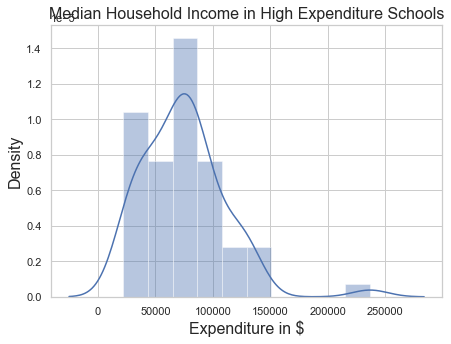

In [35]:
# Distribution plot
plt.figure(figsize=(7,5))
sns.distplot(high_expenditure['Median Household Income'])
plt.title('Median Household Income in High Expenditure Schools', fontsize = 16)

# Adding labels
_ = plt.xlabel('Expenditure in $', fontsize=16)
_ = plt.ylabel('Density', fontsize=16)

plt.show()  

- Current Expense Per ADA Distribution:

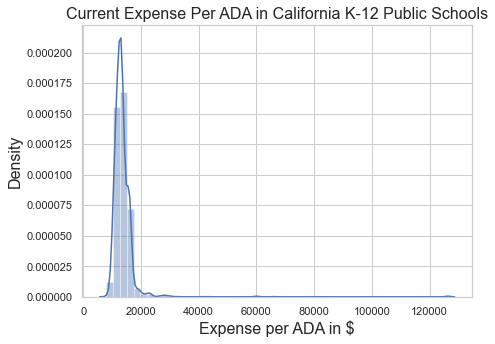

In [36]:
# Distribution plot
plt.figure(figsize=(7,5))
sns.distplot(language['Current Expense Per ADA'])
plt.title('Current Expense Per ADA in California K-12 Public Schools', fontsize = 16)

# Adding labels
_ = plt.xlabel('Expense per ADA in $', fontsize=16)
_ = plt.ylabel('Density', fontsize=16)

plt.show()  

- High Expense Per ADA Investigation:

In [37]:
high_expense = language[language['Current Expense Per ADA'] > 30000]
high_expense.head()

School Name  School Code  Zip Code  \
677     Bayside Martin Luther King Jr. Academy      6024889     94965   
808                            Big Sur Charter       118349     93940   
870                 Bolinas-Stinson Elementary      6024137     94924   
1172    California Virtual Academy @ San Diego      6120893     93065   
1173  California Virtual Academy @ San Joaquin       127191     93065   

      County Name  County Code   Latitude   Longitude  \
677         Marin         21.0   0.000000    0.000000   
808      Monterey         27.0  35.919829 -121.466084   
870         Marin         21.0   0.000000    0.000000   
1172    San Diego         37.0  33.096564 -116.645535   
1173  San Joaquin         39.0  37.667956 -121.324130   

      Median Household Income  CAASPP Reported Enrollment  Enrollment K-12  \
677                   89715.0                        54.0            119.0   
808                   67716.0                        63.0            101.0   
870                   73621.0                        56.0             90.0   
1172                  94173.0                      1234.0           2139.0   
1173                  94173.0                       869.0           1433.0   

      ...  Hispanic  Pacific Islander  White  Two/More Races  < High School  \
677   ...     33.33              0.00  -1.85            9.26          12.96   
808   ...     22.22              0.00  50.79           20.63           0.00   
870   ...     17.86              0.00  62.50           12.50          -1.79   
1172  ...     11.43              0.73  57.13            7.21          -0.08   
1173  ...      8.40              1.61  42.46           11.62          -0.12   

      High School Grad  Some College  College Grad  Graduate School  \
677              46.30         29.63          9.26            -1.85   
808              -1.59         15.87         38.10            42.86   
870              10.71         23.21         26.79            33.93   
1172             10.62          2.43          3.40             1.54   
1173              9.67          2.30          3.34             1.27   

      Percentage Standard Met and Above  
677                               20.75  
808                               72.41  
870                               56.25  
1172                              41.09  
1173                              37.16  

[5 rows x 35 columns]

- Free or Reduced Meal Distribution:

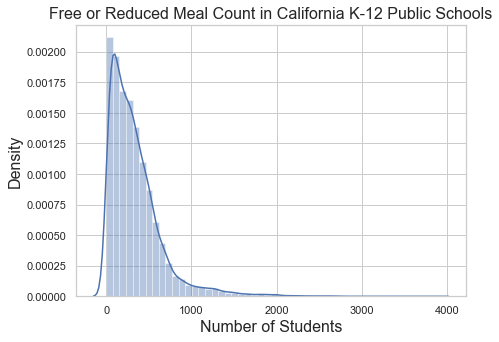

In [38]:
# Distribution plot
plt.figure(figsize=(7,5))
sns.distplot(language['Free Meal Count K-12'])
plt.title('Free or Reduced Meal Count in California K-12 Public Schools', fontsize = 16)

# Adding labels
_ = plt.xlabel('Number of Students', fontsize=16)
_ = plt.ylabel('Density', fontsize=16)

plt.show()

- Male Student Distribution:

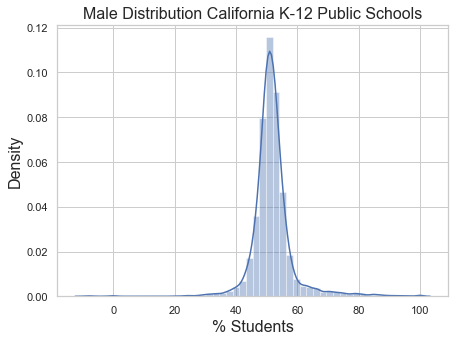

In [39]:
# Distribution plot
plt.figure(figsize=(7,5))
sns.distplot(language['Male'])
plt.title('Male Distribution California K-12 Public Schools', fontsize = 16)

# Adding labels
_ = plt.xlabel('% Students', fontsize=16)
_ = plt.ylabel('Density', fontsize=16)

plt.show()

- Female Student Distribution:

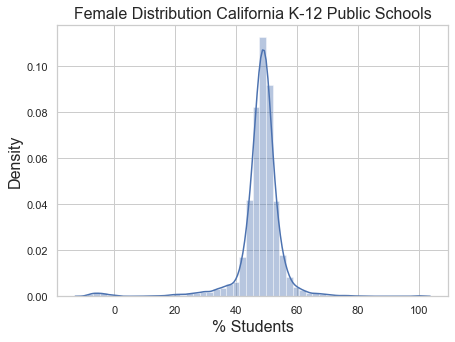

In [40]:
# Distribution plot
plt.figure(figsize=(7,5))
sns.distplot(language['Female'])
plt.title('Female Distribution California K-12 Public Schools', fontsize = 16)

# Adding labels
_ = plt.xlabel('% Students', fontsize=16)
_ = plt.ylabel('Density', fontsize=16)

plt.show()

- Military Family Student Distribution:

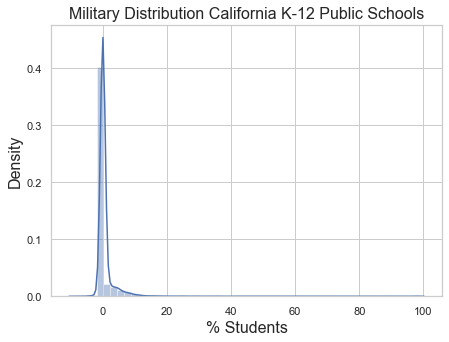

In [41]:
# Distribution plot
plt.figure(figsize=(7,5))
sns.distplot(language['Military'])
plt.title('Military Distribution California K-12 Public Schools', fontsize = 16)

# Adding labels
_ = plt.xlabel('% Students', fontsize=16)
_ = plt.ylabel('Density', fontsize=16)

plt.show()

- Non Military Family Student Distribution:

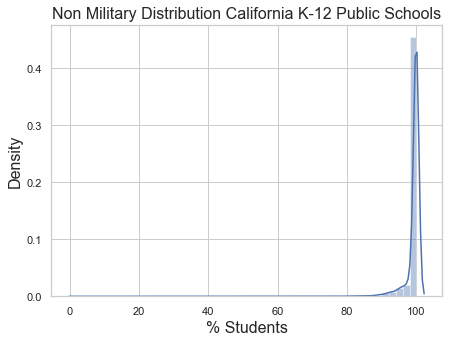

In [42]:
# Distribution plot
plt.figure(figsize=(7,5))
sns.distplot(language['Non Military'])
plt.title('Non Military Distribution California K-12 Public Schools', fontsize = 16)

# Adding labels
_ = plt.xlabel('% Students', fontsize=16)
_ = plt.ylabel('Density', fontsize=16)

plt.show()

- Military and Non Military Family Student Distribution:

Text(13.304100000000005, 0.5, 'Density')

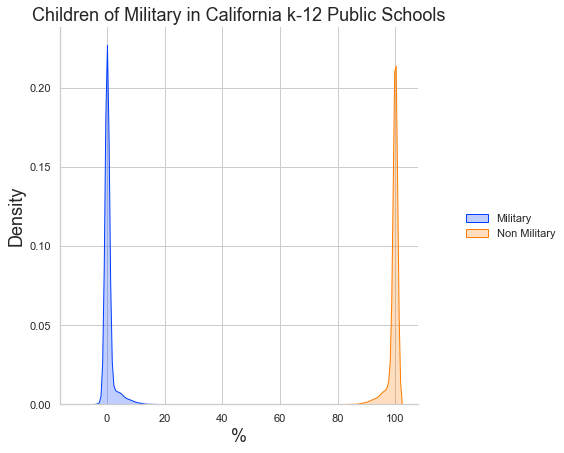

In [43]:
# subset features of interest
mil = language[['Military', 'Non Military']]

# plot
_ = sns.displot(mil, kind="kde", fill=True, palette="bright")
_.fig.set_size_inches(8,6)
plt.title("Children of Military in California k-12 Public Schools", fontsize=18)
plt.xlabel('%', fontsize=18)
plt.ylabel('Density', fontsize=18)

- Homeless Student Distribution:

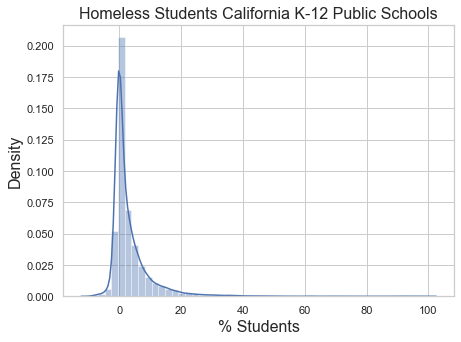

In [44]:
# Distribution plot
plt.figure(figsize=(7,5))
sns.distplot(language['Homeless'])
plt.title('Homeless Students California K-12 Public Schools', fontsize = 16)

# Adding labels
_ = plt.xlabel('% Students', fontsize=16)
_ = plt.ylabel('Density', fontsize=16)

plt.show()

- Schools with Homeless Students Investigation:

In [45]:
homeless = language[language['Homeless'] > 30]
homeless

School Name  School Code  Zip Code  \
63    Achieve Charter School of Paradise Inc.       110338     95928   
69            Adam (William Laird) Elementary      6045959     93458   
95                         Aeolian Elementary      6020085     90606   
363      Anna A. Borba Fundamental Elementary      6098362     91710   
367                Anna M. Glazier Elementary      6020838     90650   
...                                       ...          ...       ...   
9088                        Walker Elementary      6089064     92126   
9156                    Washington Elementary      6030431     92707   
9444                        Willow Elementary       123000     92173   
9450                   Willow Oaks Elementary      6044416     94025   
9595                       Yorbita Elementary      6022412     91744   

         County Name  County Code   Latitude   Longitude  \
63             Butte          4.0  39.778700 -121.589900   
69     Santa Barbara         42.0   0.000000    0.000000   
95       Los Angeles         19.0   0.000000    0.000000   
363   San Bernardino         36.0  34.019441 -117.691621   
367      Los Angeles         19.0  33.914100 -118.081700   
...              ...          ...        ...         ...   
9088       San Diego         37.0  32.755280 -117.147591   
9156          Orange         30.0  33.742600 -117.846700   
9444       San Diego         37.0  32.564260 -117.039991   
9450       San Mateo         41.0  37.463737 -122.143509   
9595     Los Angeles         19.0  33.985314 -117.888584   

      Median Household Income  CAASPP Reported Enrollment  Enrollment K-12  \
63                    45906.0                       131.0            236.0   
69                    43803.0                       503.0            938.0   
95                    63833.0                       265.0            414.0   
363                   71825.0                       279.0            495.0   
367                   60523.0                       237.0            531.0   
...                       ...                         ...              ...   
9088                  85707.0                       208.0            401.0   
9156                  57038.0                       347.0            750.0   
9444                  35745.0                       474.0            789.0   
9450                 119095.0                       260.0            416.0   
9595                  57789.0                       276.0            475.0   

      ...  Hispanic  Pacific Islander  White  Two/More Races  < High School  \
63    ...     11.45              0.00  76.34            5.34          -0.76   
69    ...     97.22              0.00   1.99            0.00          79.52   
95    ...     96.98              0.00   1.89           -0.38          20.00   
363   ...     94.98              0.00   3.23            0.00          28.32   
367   ...     89.45             -0.42  -0.42            1.69          11.39   
...   ...       ...               ...    ...             ...            ...   
9088  ...     54.33              1.92   5.29            8.17          12.98   
9156  ...     97.98             -0.29  -0.29           -0.29          45.24   
9444  ...     98.73              0.00   0.00            0.00          30.59   
9450  ...     86.92              5.77  -0.38           -0.38          56.92   
9595  ...     89.13              0.00   1.81           -0.36          25.00   

      High School Grad  Some College  College Grad  Graduate School  \
63               21.37         10.69         51.91            12.21   
69               11.33          3.38         -0.20             0.80   
95               34.34         30.57         12.08             2.26   
363              31.90         11.11          6.45            -0.36   
367              39.66         29.54         10.13             5.91   
...                ...           ...           ...              ...   
9088             21.63         20.19         19.71             6.

- Standard Met and Above in High Population of Homeless Students:

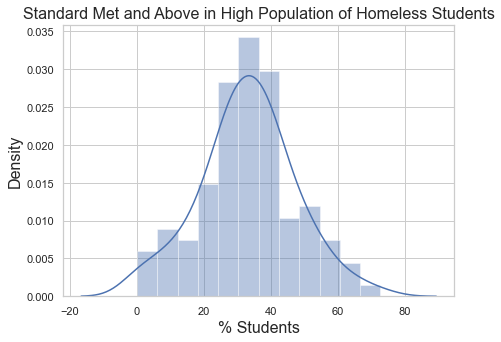

In [46]:
# Distribution plot
plt.figure(figsize=(7,5))
sns.distplot(homeless['Percentage Standard Met and Above'])
plt.title('Standard Met and Above in High Population of Homeless Students', fontsize = 16)

# Adding labels
_ = plt.xlabel('% Students', fontsize=16)
_ = plt.ylabel('Density', fontsize=16)

plt.show()

- Non Homeless Student Distribution:

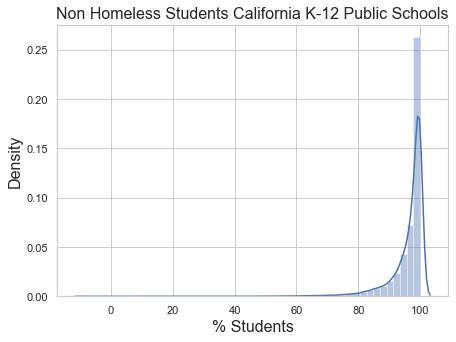

In [47]:
# Distribution plot
plt.figure(figsize=(7,5))
sns.distplot(language['Non Homeless'])
plt.title('Non Homeless Students California K-12 Public Schools', fontsize = 16)

# Adding labels
_ = plt.xlabel('% Students', fontsize=16)
_ = plt.ylabel('Density', fontsize=16)

plt.show()

Text(14.602600000000002, 0.5, 'Density')

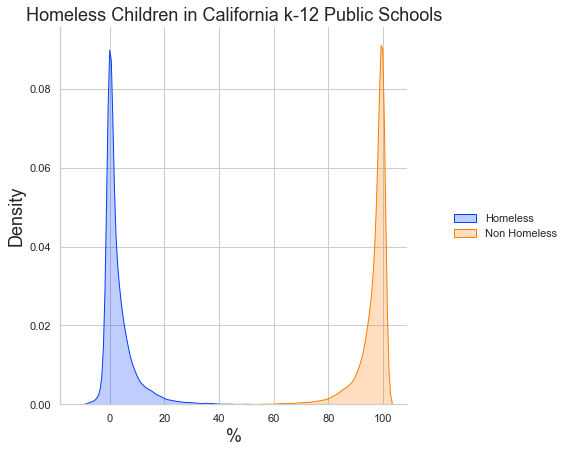

In [48]:
# subset features
hom = language[['Homeless', 'Non Homeless']]

# plot
_ = sns.displot(hom, kind="kde", fill=True, palette="bright")
_.fig.set_size_inches(8,6)
plt.title("Homeless Children in California k-12 Public Schools", fontsize=18)
plt.xlabel('%', fontsize=18)
plt.ylabel('Density', fontsize=18)

- Economically Disadvantaged Student Distribution:

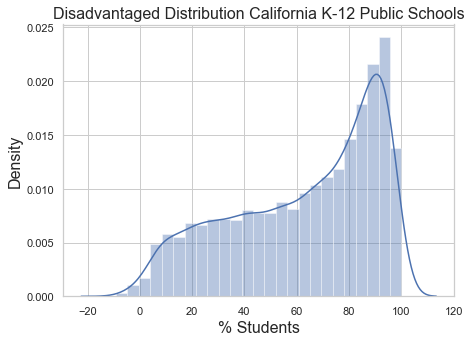

In [49]:
# Distribution plot
plt.figure(figsize=(7,5))
sns.distplot(language['Disadvantaged'])
plt.title('Disadvantaged Distribution California K-12 Public Schools', fontsize = 16)

# Adding labels
_ = plt.xlabel('% Students', fontsize=16)
_ = plt.ylabel('Density', fontsize=16)

plt.show()

- Not Economically Disadvantaged Student Distribution:

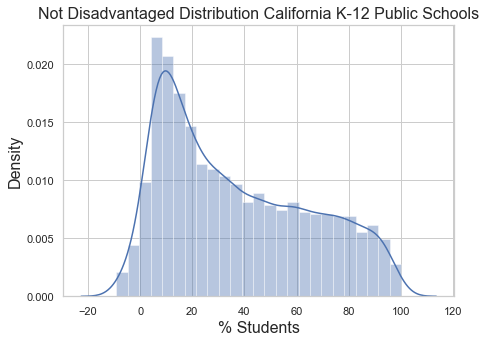

In [50]:
# Distribution plot
plt.figure(figsize=(7,5))
sns.distplot(language['Not Disadvantaged'])
plt.title('Not Disadvantaged Distribution California K-12 Public Schools', fontsize = 16)

# Adding labels
_ = plt.xlabel('% Students', fontsize=16)
_ = plt.ylabel('Density', fontsize=16)

plt.show()

Text(10.771016666666675, 0.5, 'Density')

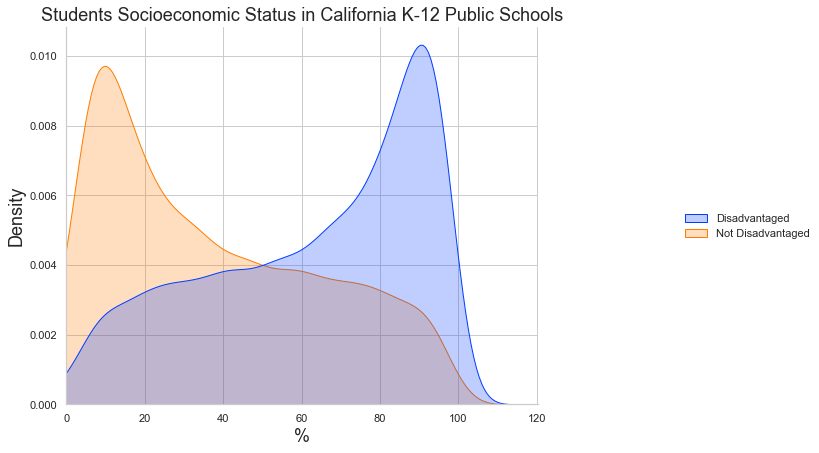

In [51]:
# subset feature of interest
econ = language[['Disadvantaged', 'Not Disadvantaged']]

# plot
_ = sns.displot(econ, kind="kde", fill=True, palette="bright")
_.fig.set_size_inches(12,6)
plt.title("Students Socioeconomic Status in California K-12 Public Schools", fontsize=18)
plt.xlabel('%', fontsize=18)
plt.xlim(xmin=0)
plt.ylabel('Density', fontsize=18)

- Parents Education Boxplot:

<Figure size 864x576 with 0 Axes>

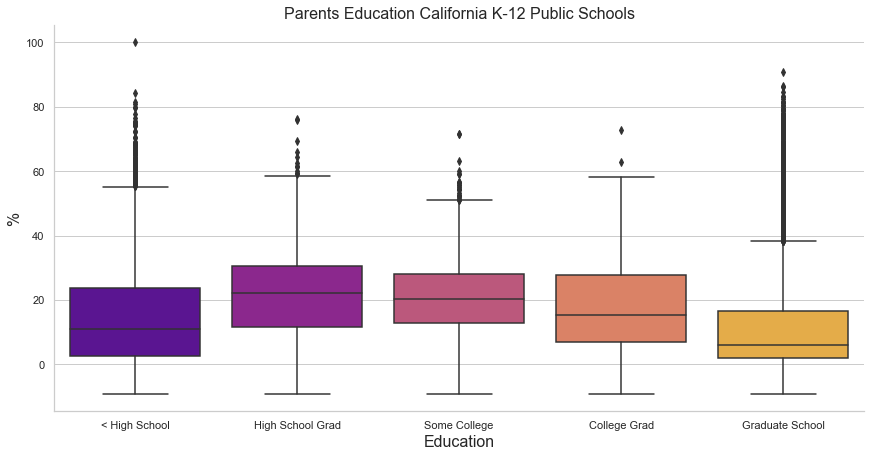

In [52]:
# Subset columns of interest
boxplot1 = language[['< High School', 'High School Grad','Some College', 'College Grad', 'Graduate School']]

# Plot distribution
plt.figure(figsize=(12,8))
sns.set_theme(style="whitegrid")
sns.catplot(data=boxplot1, kind="box", height=6, aspect=2, palette="plasma")
_ = plt.title('Parents Education California K-12 Public Schools', fontsize=16)
_ = plt.xlabel('Education', fontsize=16)
_ = plt.ylabel('%', fontsize=16)

- Parents Education Distribution:

Text(10.059266666666673, 0.5, 'Density')

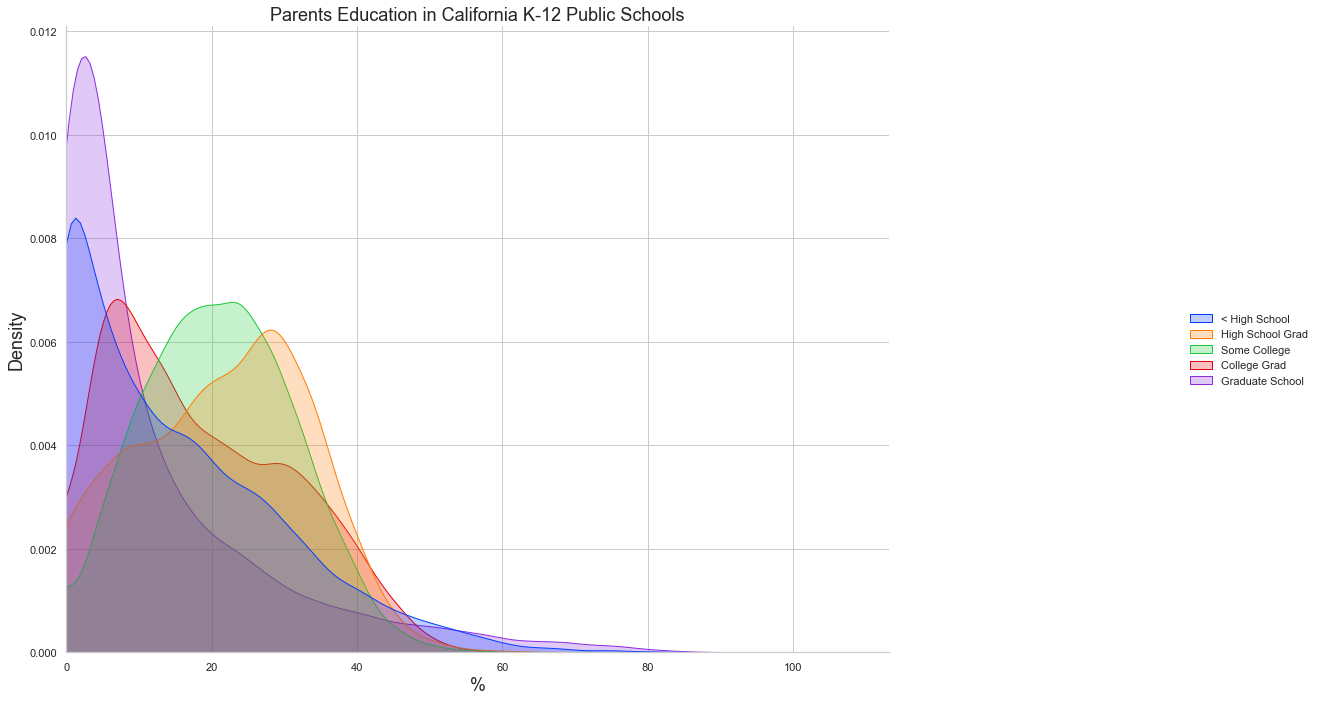

In [53]:
# distribution plot
_ = sns.displot(boxplot1, kind="kde", fill=True, palette="bright")
_.fig.set_size_inches(20,10)
plt.title("Parents Education in California K-12 Public Schools", fontsize=18)
plt.xlabel('%', fontsize=18)
plt.xlim(xmin=0)
plt.ylabel('Density', fontsize=18)

- Parents Education: < High School Distribution:

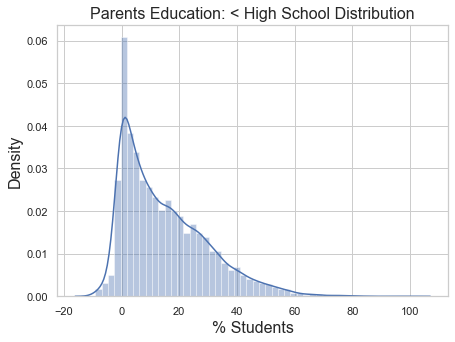

In [54]:
# Distribution plot
plt.figure(figsize=(7,5))
sns.distplot(language['< High School'])
plt.title('Parents Education: < High School Distribution', fontsize = 16)

# Adding labels
_ = plt.xlabel('% Students', fontsize=16)
_ = plt.ylabel('Density', fontsize=16)

plt.show()

- Parents Education: High School Graduate Distribution:

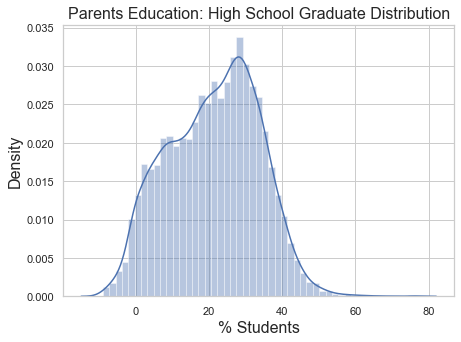

In [55]:
# Distribution plot
plt.figure(figsize=(7,5))
sns.distplot(language['High School Grad'])
plt.title('Parents Education: High School Graduate Distribution', fontsize = 16)

# Adding labels
_ = plt.xlabel('% Students', fontsize=16)
_ = plt.ylabel('Density', fontsize=16)

plt.show()

- Parents Education: Some College Distribution:

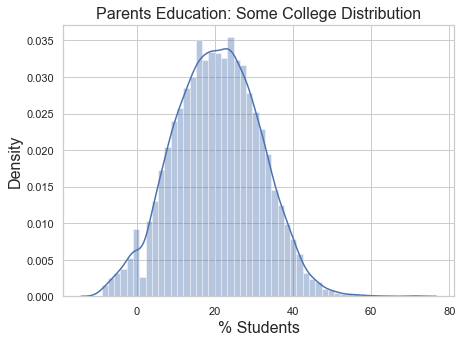

In [56]:
# Distribution plot
plt.figure(figsize=(7,5))
sns.distplot(language['Some College'])
plt.title('Parents Education: Some College Distribution', fontsize = 16)

# Adding labels
_ = plt.xlabel('% Students', fontsize=16)
_ = plt.ylabel('Density', fontsize=16)

plt.show()

- Parents Education: College Graduate Distribution:

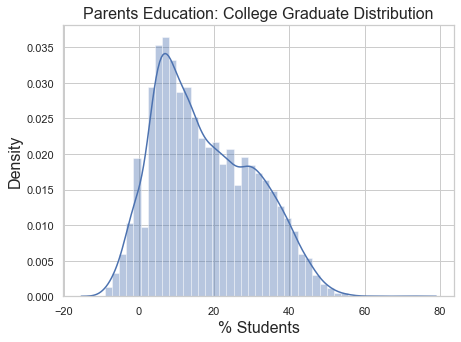

In [57]:
# Distribution plot
plt.figure(figsize=(7,5))
sns.distplot(language['College Grad'])
plt.title('Parents Education: College Graduate Distribution', fontsize = 16)

# Adding labels
_ = plt.xlabel('% Students', fontsize=16)
_ = plt.ylabel('Density', fontsize=16)

plt.show()

- Parents Education: Graduate School Graduate Distribution:

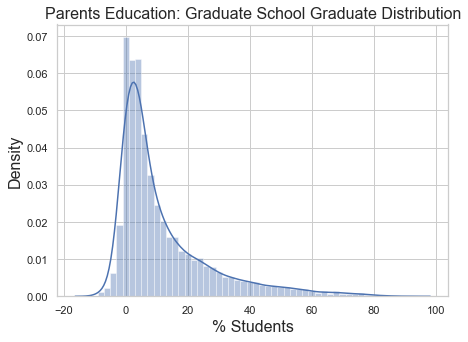

In [58]:
# Distribution plot
plt.figure(figsize=(7,5))
sns.distplot(language['Graduate School'])
plt.title('Parents Education: Graduate School Graduate Distribution', fontsize = 16)

# Adding labels
_ = plt.xlabel('% Students', fontsize=16)
_ = plt.ylabel('Density', fontsize=16)

plt.show()

-----------

## Pairwise relationship between dependent variable and independent variables



- **Dependent variable**: 
    - 'Percentage Standard Met and Above'
- **Independent variables**:
    - 'Median Household Income', 
    - 'CAASPP Reported Enrollment', 'Enrollment K-12', 
    - 'Total Revenue per Pupil', 'Total Expenditures per Pupil', 
    - 'Free Meal Count K-12', 'Current Expense Per ADA', 
    - 'Male', 'Female', 
    - 'Military', 'Non Military',
    - 'Homeless', 'Non Homeless', '
    - Disadvantaged', 'Not Disadvantaged',
    - 'Black', 'Native American', 'Asian', 'Hispanic', 'Pacific Islander','White', 'Two/More Races', 
    - '< High School', 'High School Grad','Some College', 'College Grad', 'Graduate School'

In [59]:
language.columns

Index(['School Name', 'School Code', 'Zip Code', 'County Name', 'County Code',
       'Latitude', 'Longitude', 'Median Household Income',
       'CAASPP Reported Enrollment', 'Enrollment K-12',
       'Total Revenue per Pupil', 'Total Expenditures per Pupil',
       'Free Meal Count K-12', 'Current Expense Per ADA', 'Male', 'Female',
       'Military', 'Non Military', 'Homeless', 'Non Homeless', 'Disadvantaged',
       'Not Disadvantaged', 'Black', 'Native American', 'Asian', 'Hispanic',
       'Pacific Islander', 'White', 'Two/More Races', '< High School',
       'High School Grad', 'Some College', 'College Grad', 'Graduate School',
       'Percentage Standard Met and Above'],
      dtype='object')

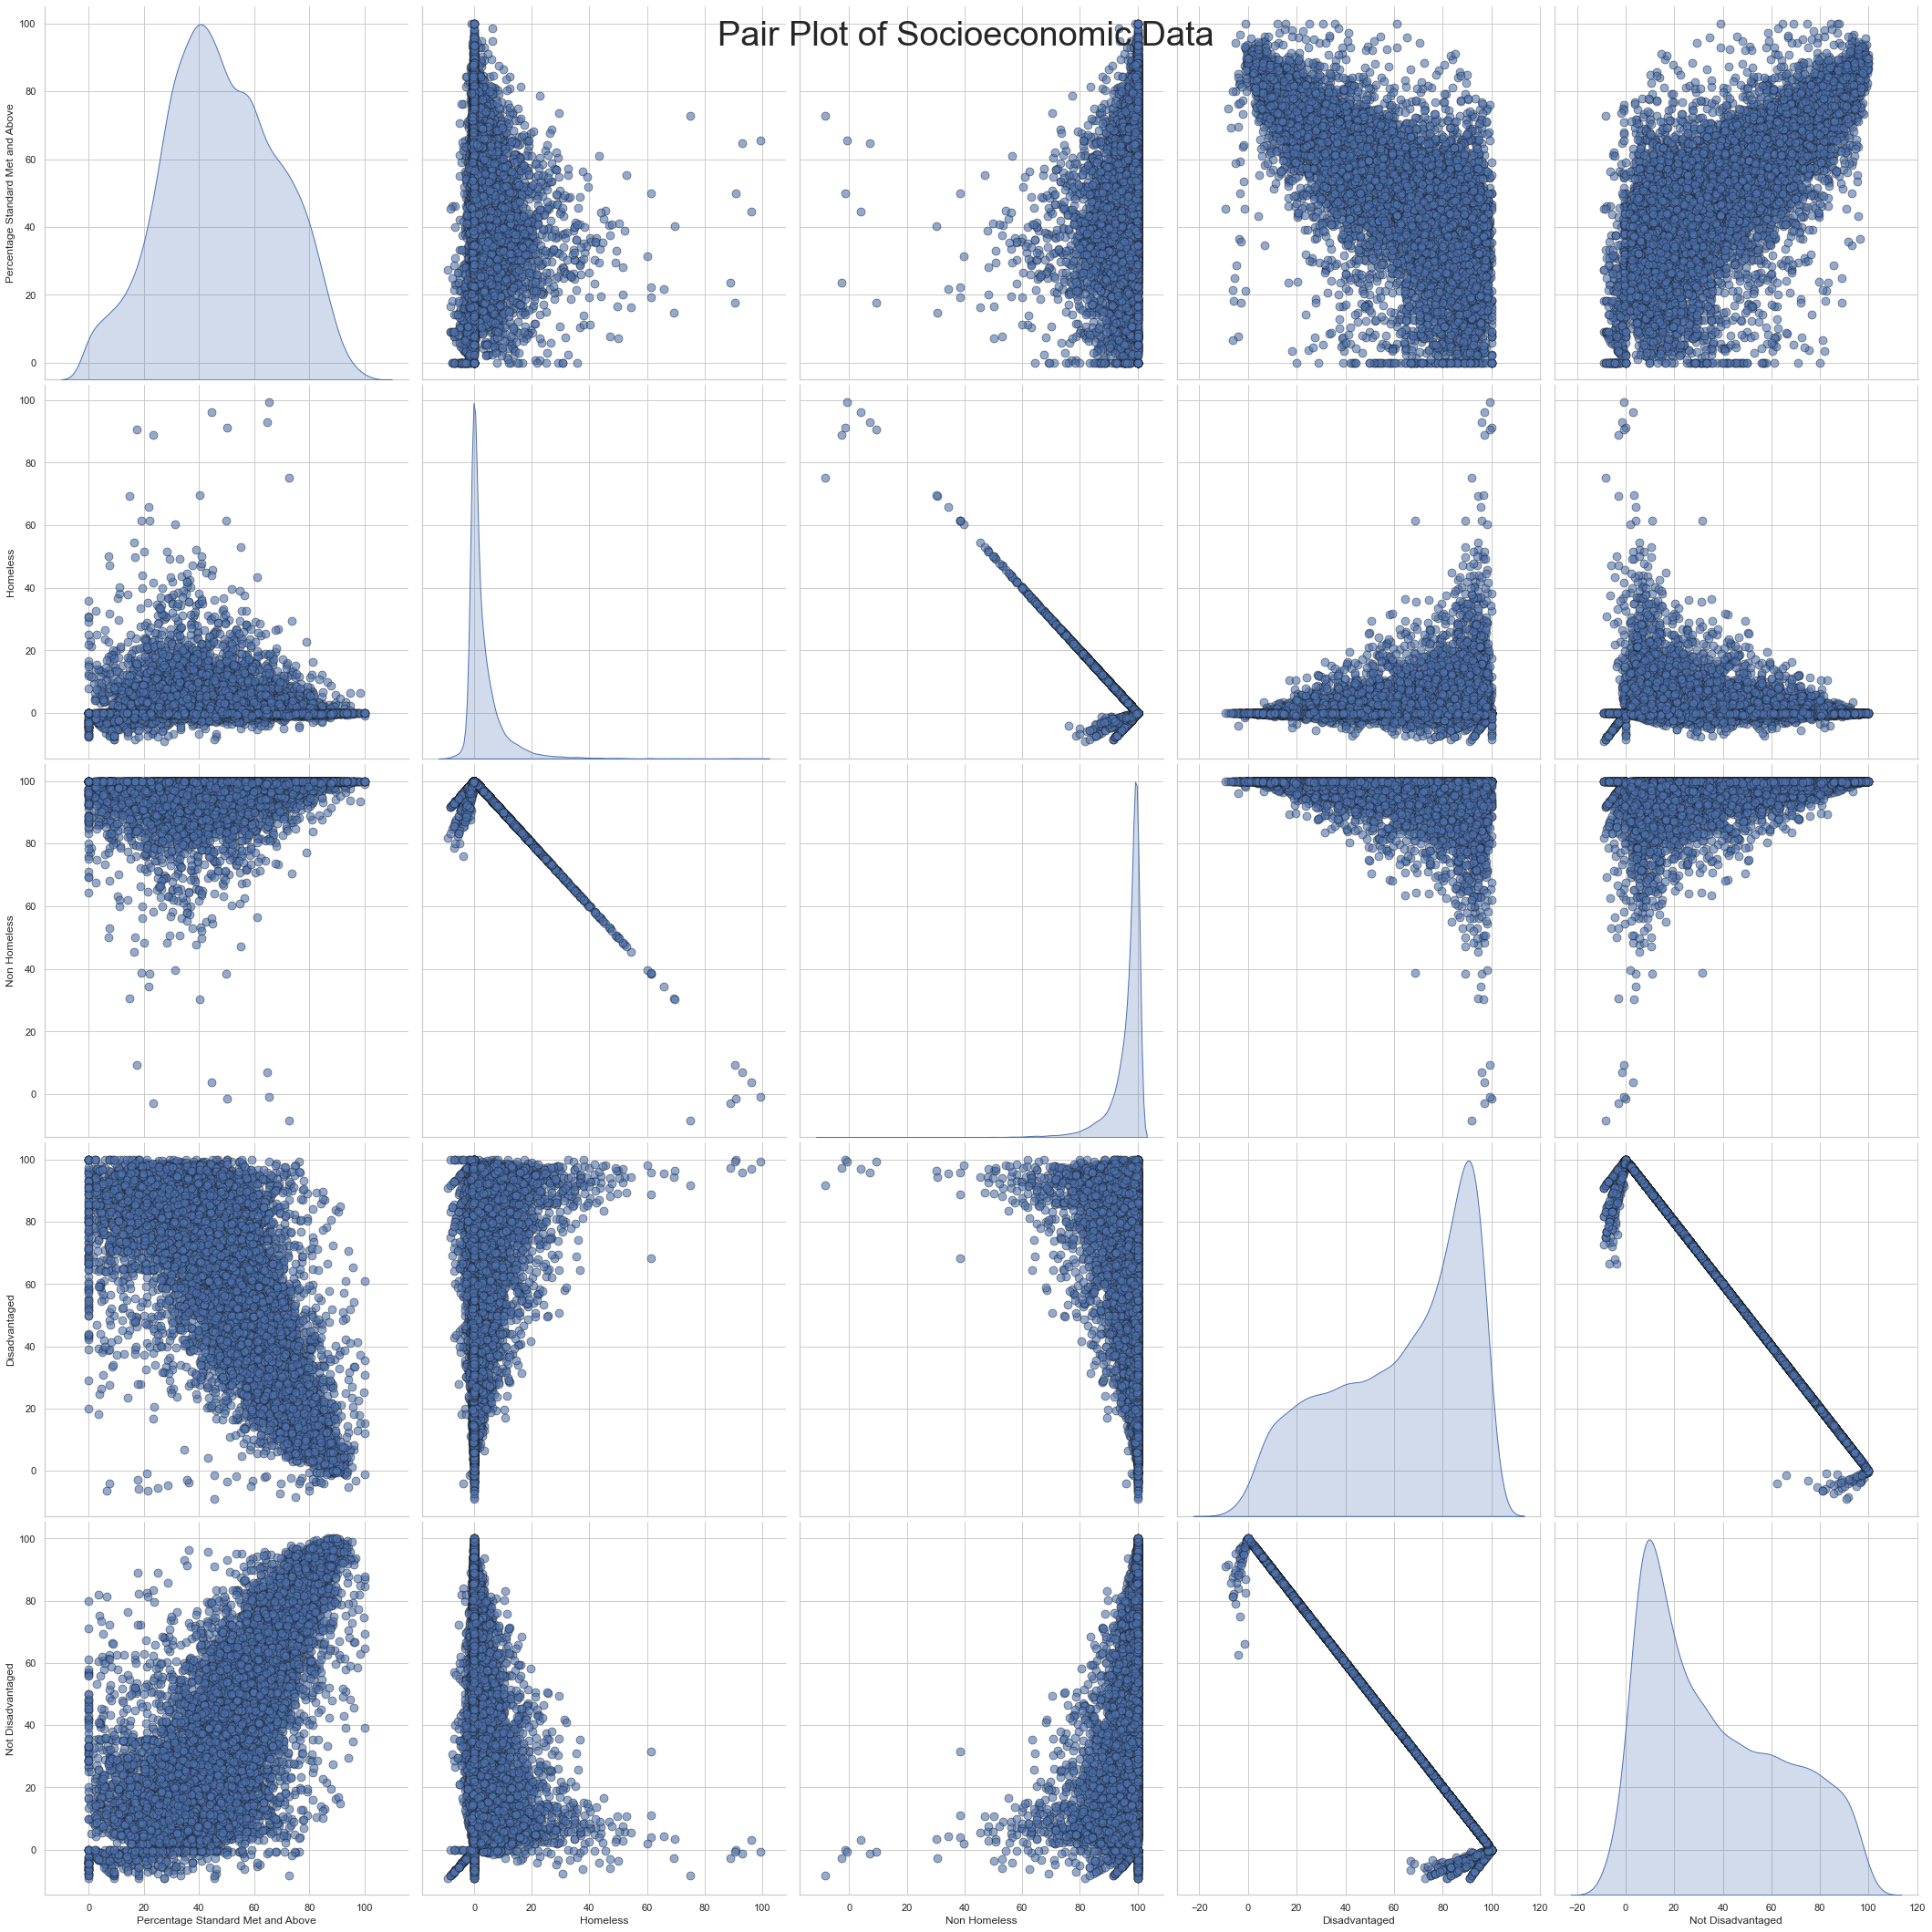

In [60]:
# Plot
sns.pairplot(#df[df['year'] >= 2000],
             language,
             vars = ['Percentage Standard Met and Above','Homeless', 'Non Homeless', 'Disadvantaged', 'Not Disadvantaged'], 
             diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, size = 6);

# Title 
plt.suptitle('Pair Plot of Socioeconomic Data', size = 38);

In [61]:
language.columns

Index(['School Name', 'School Code', 'Zip Code', 'County Name', 'County Code',
       'Latitude', 'Longitude', 'Median Household Income',
       'CAASPP Reported Enrollment', 'Enrollment K-12',
       'Total Revenue per Pupil', 'Total Expenditures per Pupil',
       'Free Meal Count K-12', 'Current Expense Per ADA', 'Male', 'Female',
       'Military', 'Non Military', 'Homeless', 'Non Homeless', 'Disadvantaged',
       'Not Disadvantaged', 'Black', 'Native American', 'Asian', 'Hispanic',
       'Pacific Islander', 'White', 'Two/More Races', '< High School',
       'High School Grad', 'Some College', 'College Grad', 'Graduate School',
       'Percentage Standard Met and Above'],
      dtype='object')

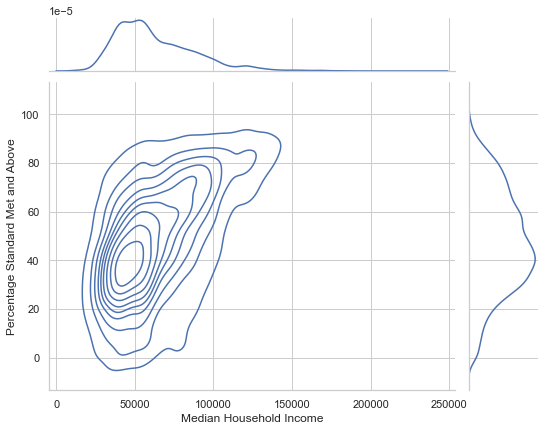

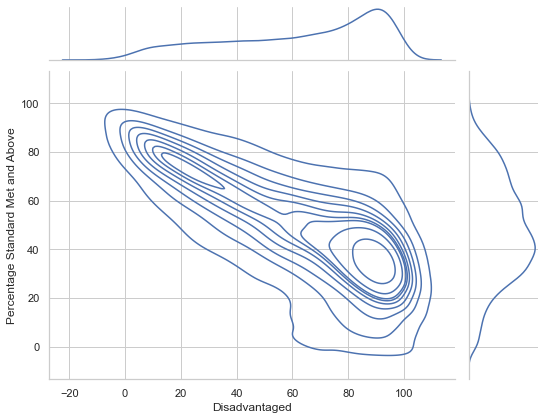

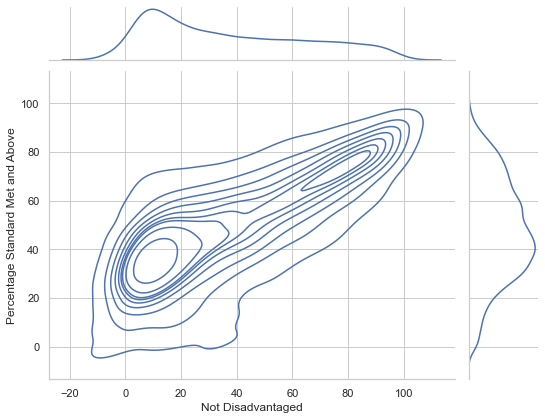

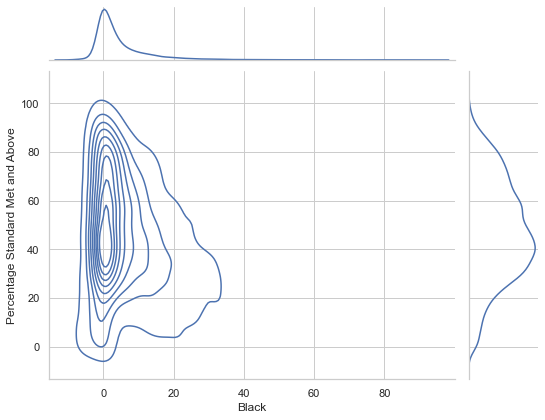

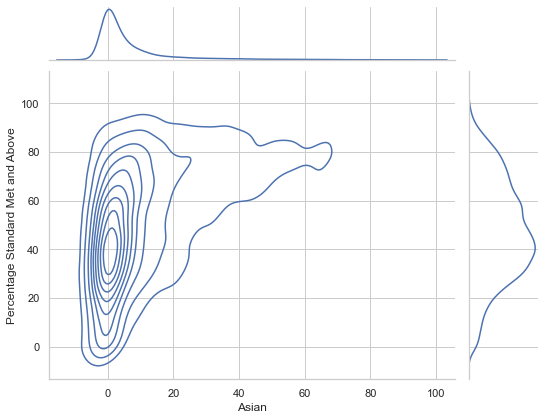

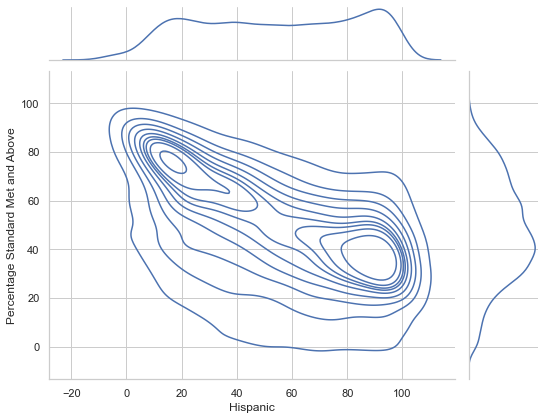

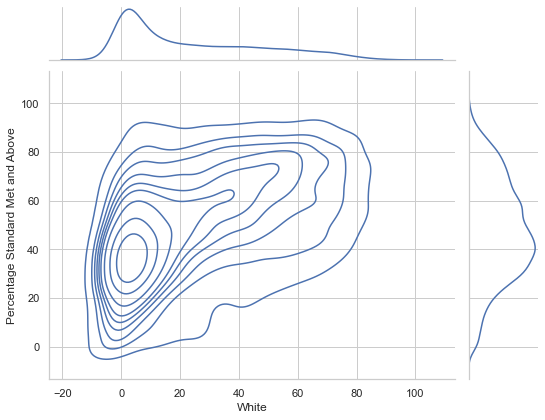

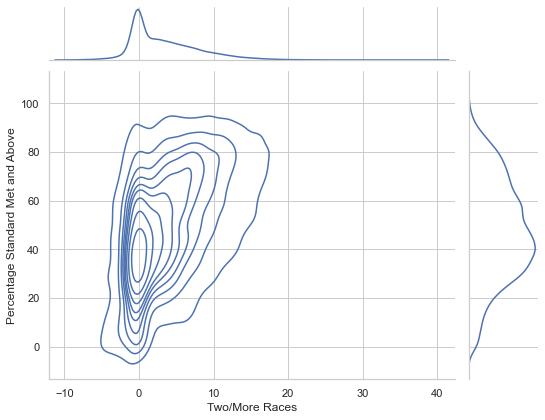

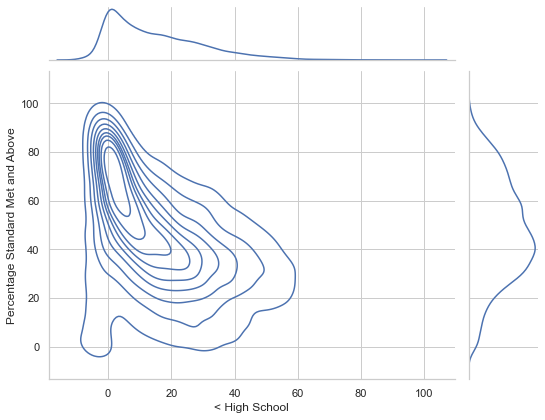

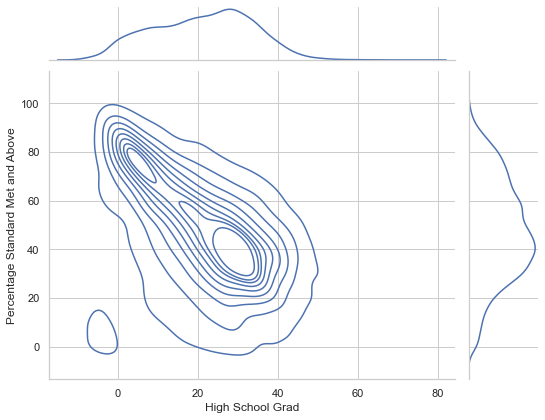

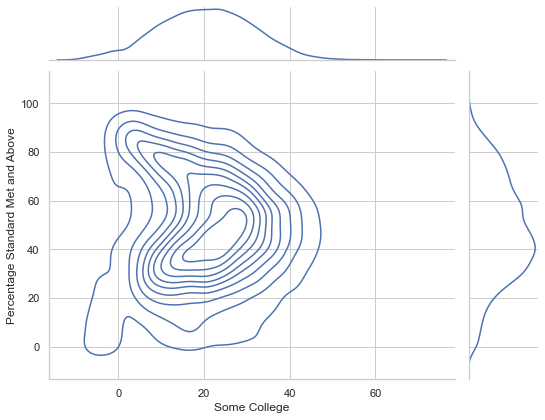

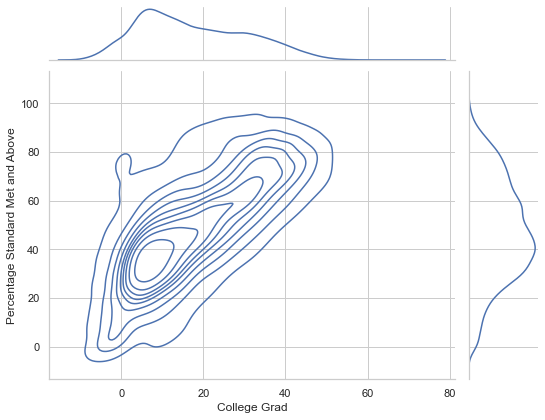

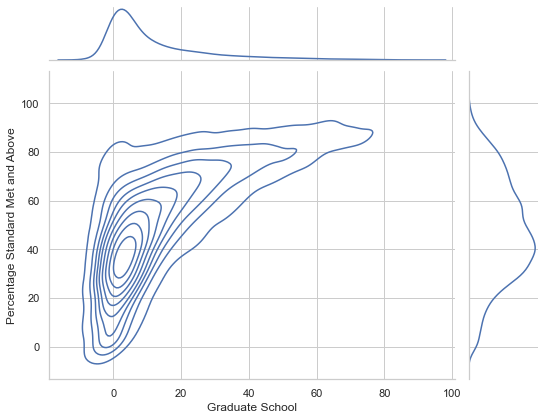

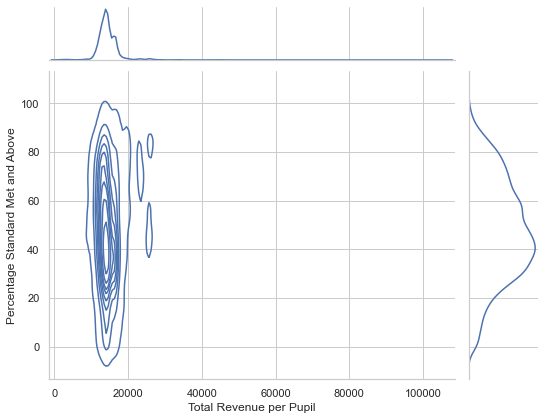

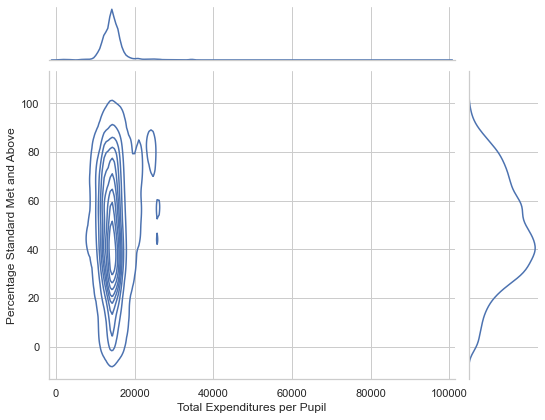

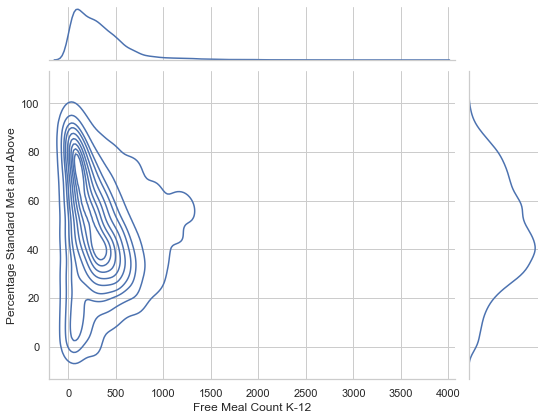

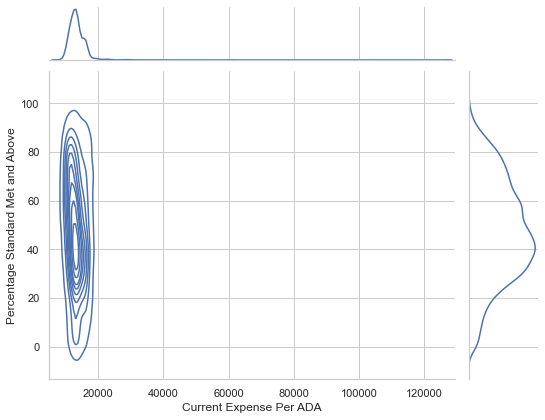

In [62]:
# jointplot
# An alternative graph to visualize the overlap of the distribution

def joint_plot(df, var):
    _ = sns.jointplot(x=var, y='Percentage Standard Met and Above', data=df, kind="kde")
    _.fig.set_size_inches(8,6)
    
demographics = ['Median Household Income','Disadvantaged',
       'Not Disadvantaged', 'Black', 'Asian', 'Hispanic',
       'White', 'Two/More Races', '< High School',
       'High School Grad', 'Some College', 'College Grad', 'Graduate School',
       'Total Revenue per Pupil', 'Total Expenditures per Pupil',
       'Free Meal Count K-12', 'Current Expense Per ADA']

for var in demographics:
    joint_plot(language, var)

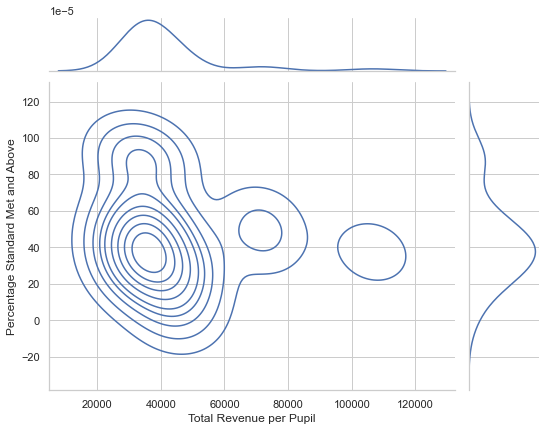

In [63]:
# jointplot
# An alternative graph to visualize the overlap of the distribution
_ = sns.jointplot(x='Total Revenue per Pupil', y='Percentage Standard Met and Above', data=high_revenue, kind="kde")
_.fig.set_size_inches(8,6)

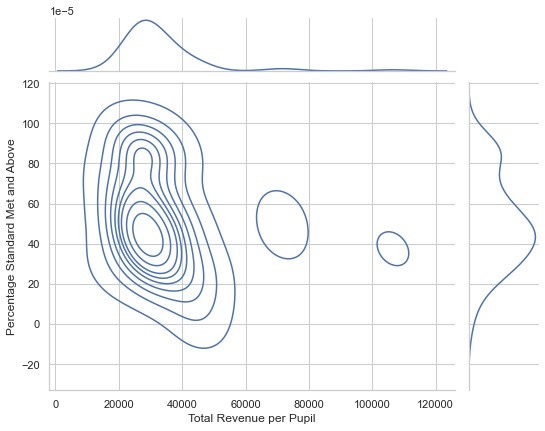

In [64]:
# jointplot
# An alternative graph to visualize the overlap of the distribution
_ = sns.jointplot(x='Total Revenue per Pupil', y='Percentage Standard Met and Above', data=high_expenditure, kind="kde")
_.fig.set_size_inches(8,6)

## Bar Plots of Pairwise Relationship between Dependent and Independent Variables

In [65]:
def bar_plot(df, var):
    bins = pd.cut(df[var], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], include_lowest=True)

    # Groupby Y and agg the functions to pass on Y using X
    grouped_df = df.groupby(bins)['Percentage Standard Met and Above'].agg(['count', 'mean'])

    # set labels
    labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
    
    # Plot
    ax = grouped_df.plot.bar(y='mean', figsize=(12,8), legend=False)
    ax.set_xticklabels(labels, rotation=45)

    # Annotate bars
    for count, p in zip(grouped_df['count'], ax.patches):
        ax.annotate(count, (p.get_x() * 1.01, p.get_height() * 1.01))

    # Label axis
    plt.title(var, fontsize = 18)
    _ = plt.xlabel('% Total Students', fontsize=16)
    _ = plt.ylabel('Average % Students Passed', fontsize=16)
    


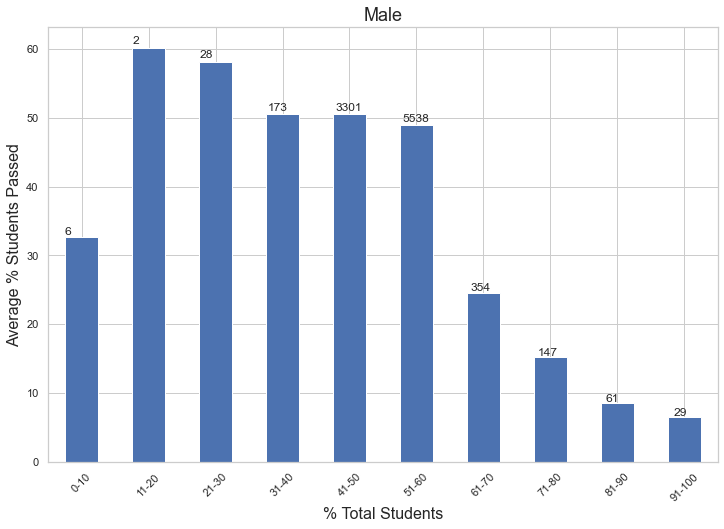

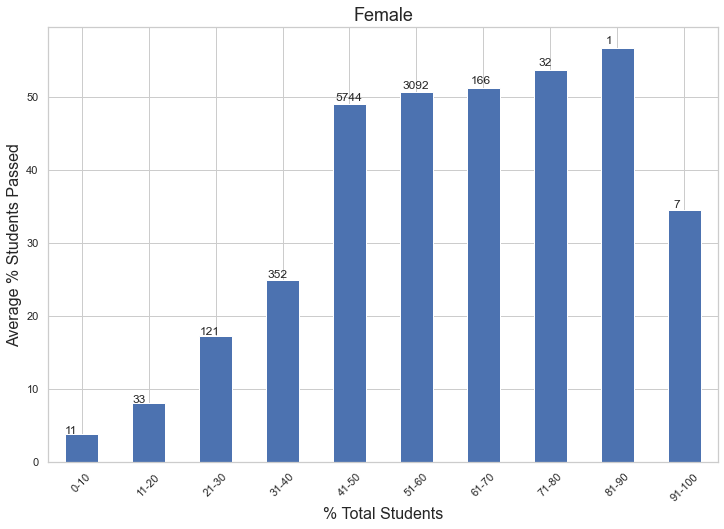

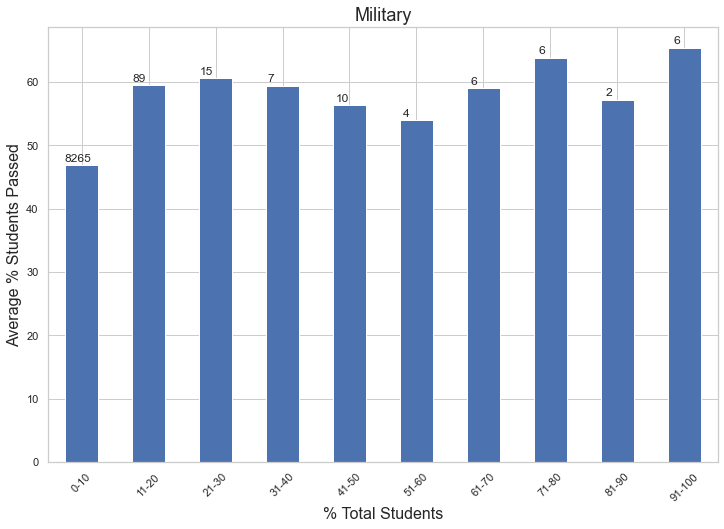

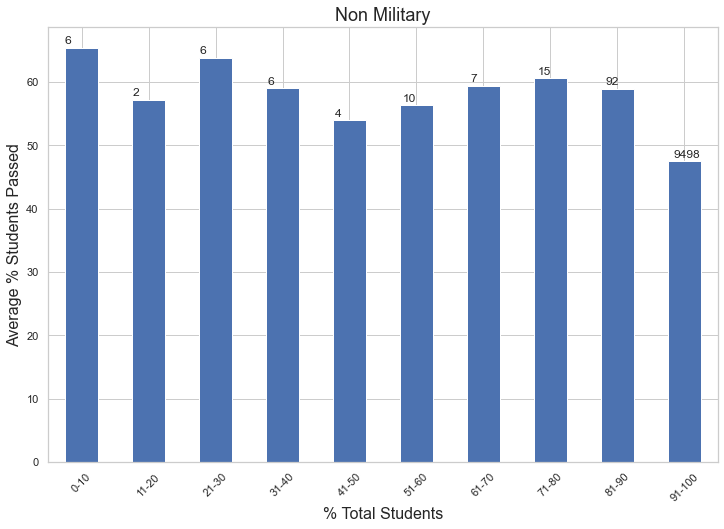

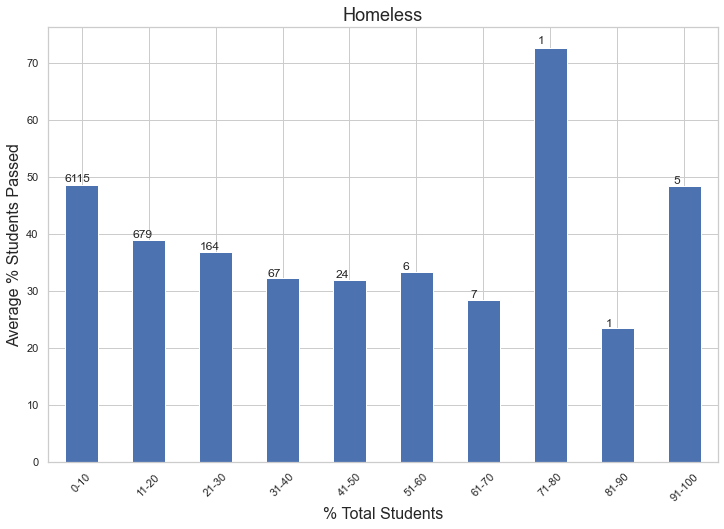

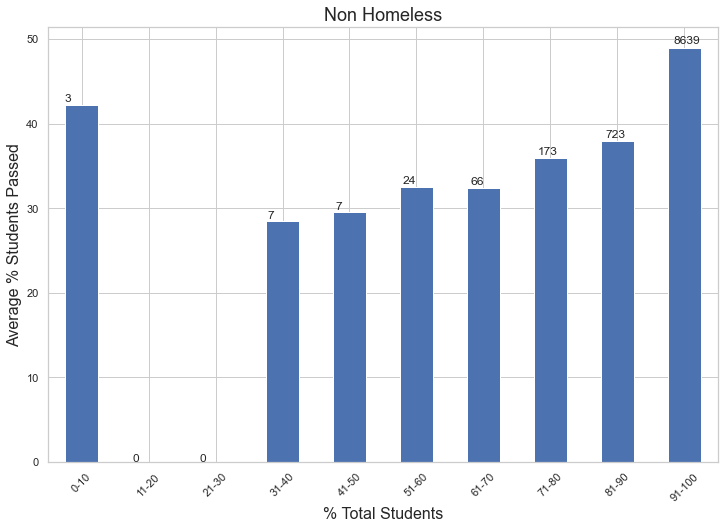

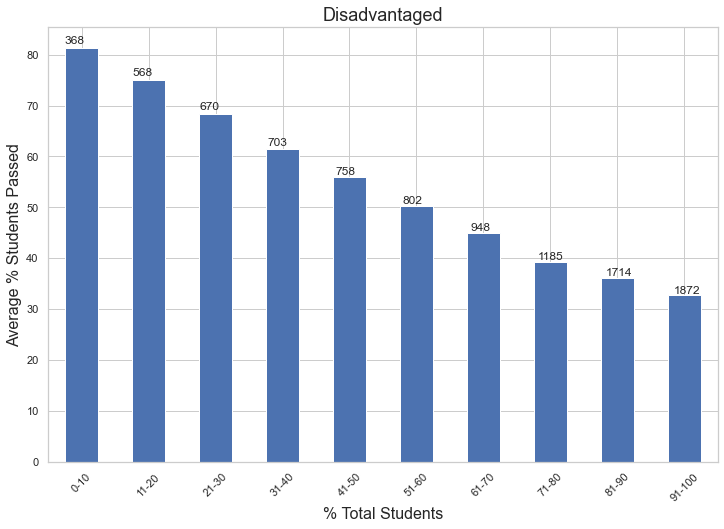

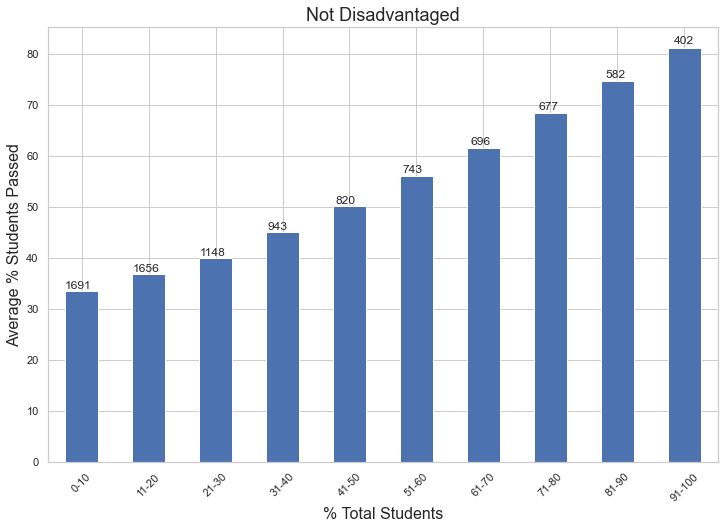

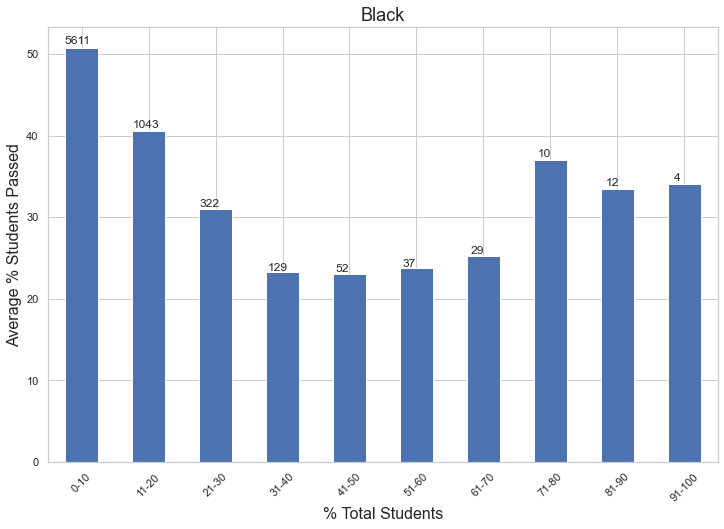

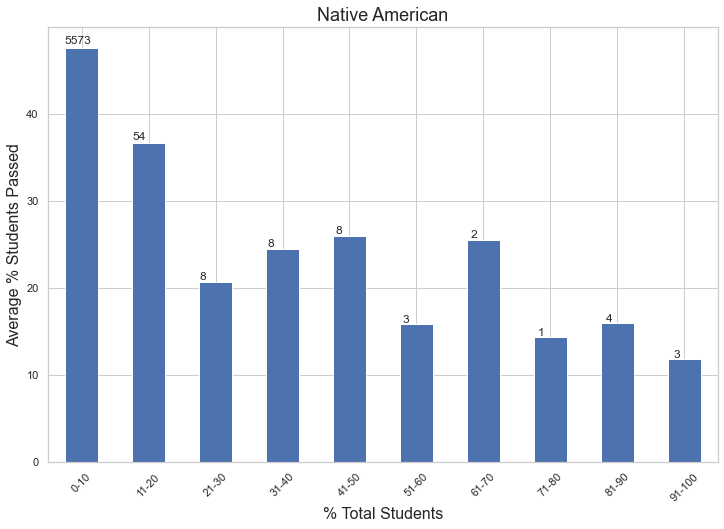

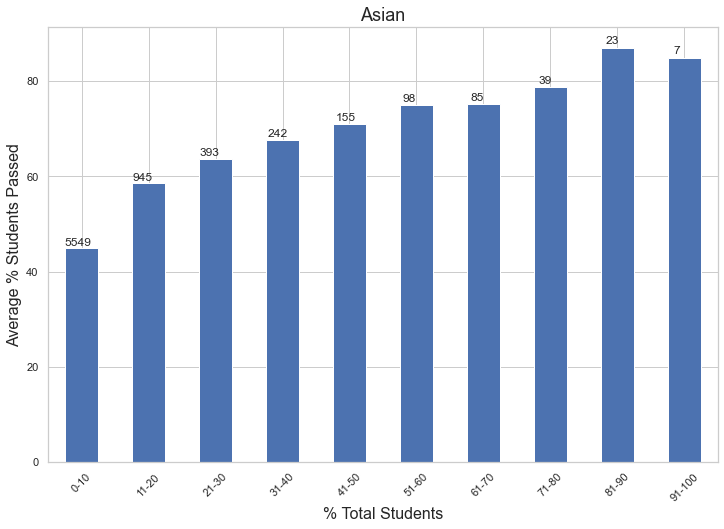

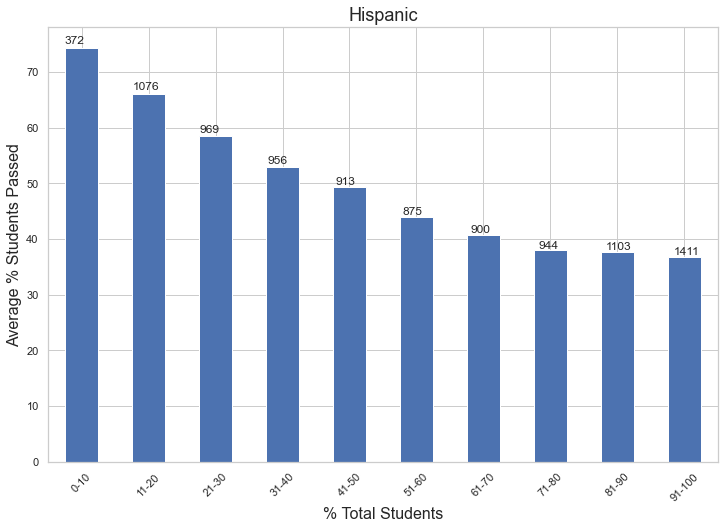

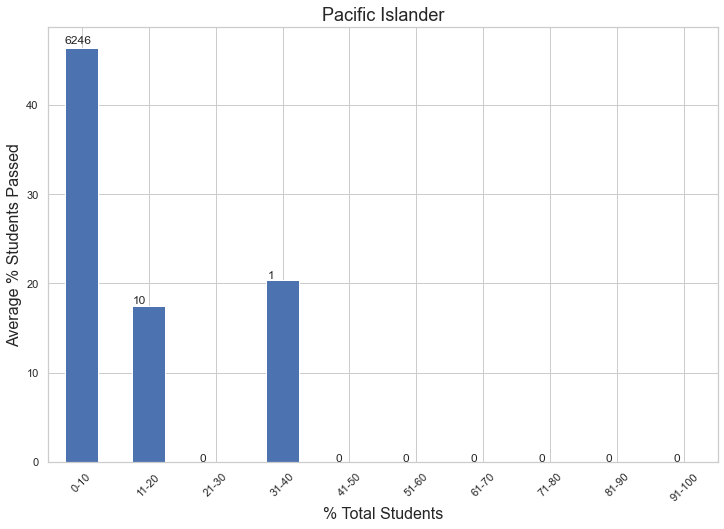

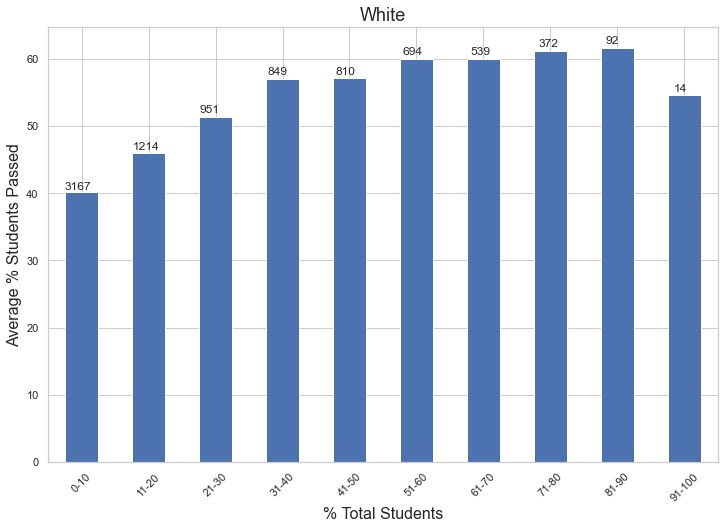

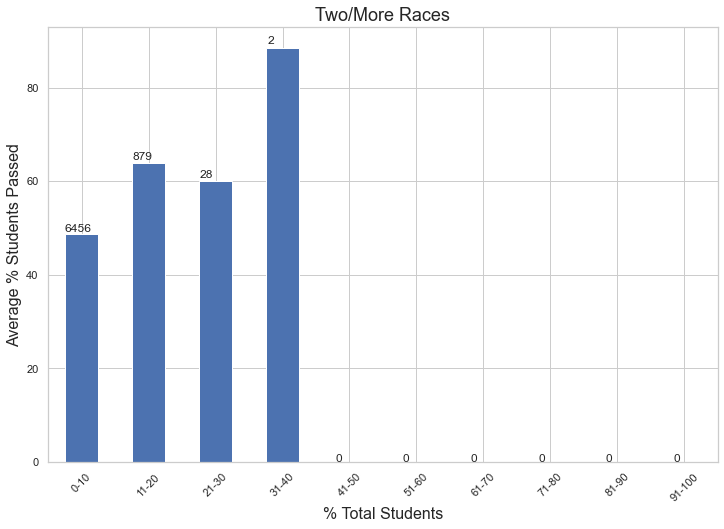

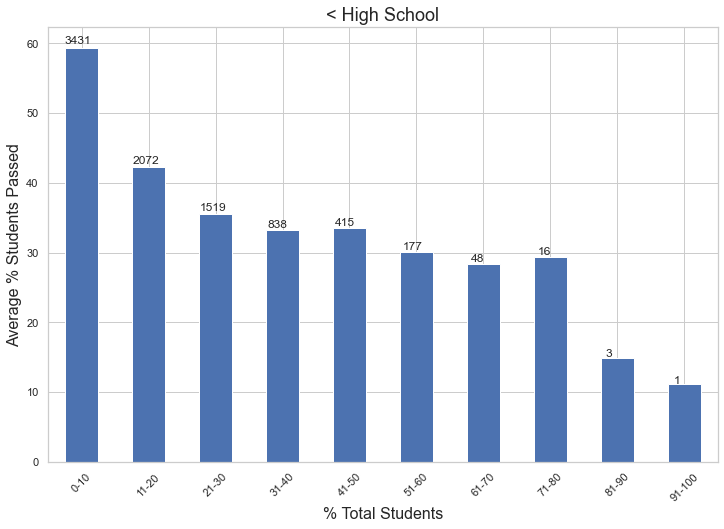

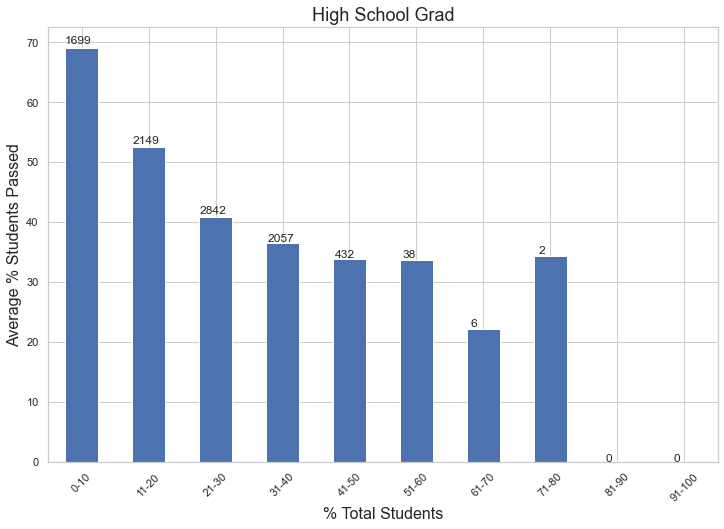

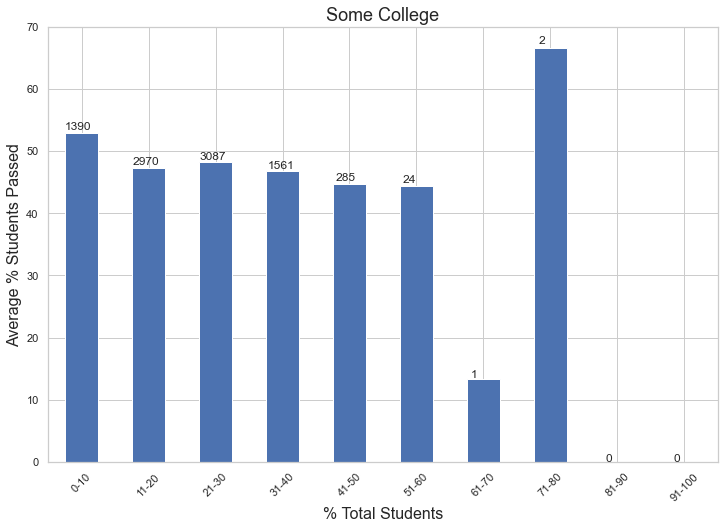

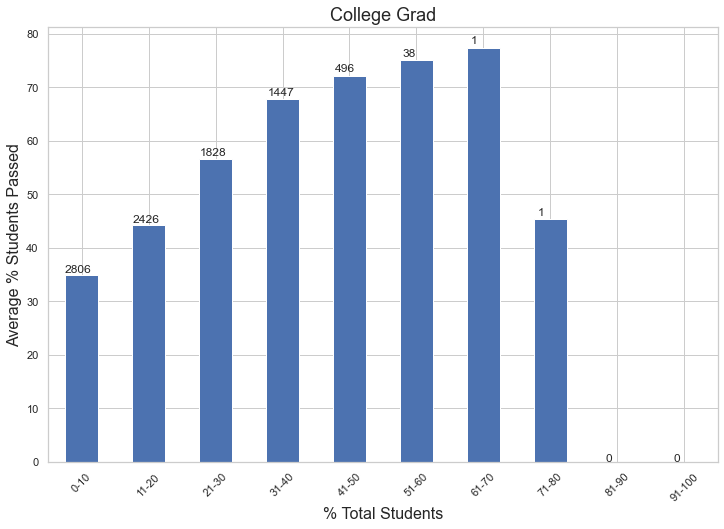

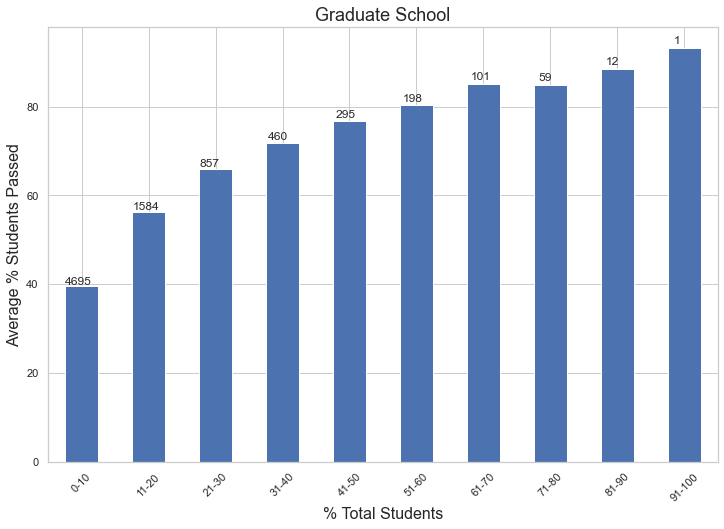

In [66]:
demographics = ['Male', 'Female', 'Military', 'Non Military', 'Homeless', 'Non Homeless',
       'Disadvantaged', 'Not Disadvantaged', 'Black', 'Native American', 'Asian', 'Hispanic',
       'Pacific Islander', 'White', 'Two/More Races', '< High School',
       'High School Grad', 'Some College', 'College Grad', 'Graduate School']

for var in demographics:
    bar_plot(language, var)

In [67]:
# map


# max_amount = float(listings['price'].max())

# folium_hmap = folium.Map(location=[40.738, -73.98],
#                         zoom_start=13,
#                         tiles="OpenStreetMap")

# hm_wide = HeatMap( list(zip(listings['latitude'], listings['longitude'], listings['price'])),
#                    min_opacity=0.2,
#                    max_val=max_amount,
#                    radius=8, blur=6, 
#                    max_zoom=15, 
#                  )

# folium_hmap.add_child(hm_wide)